In [1]:
# Import the liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#import the dataset
df=pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\Loan_data_2007_2014.csv')

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\4153615391.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\Loan_data_2007_2014.csv')


In [3]:
#To show all the columns
pd.options.display.max_columns=None

In [4]:
#show the first few rows
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check any duplicates are there
df.duplicated().sum()

0

In [6]:
#copy the original data since we will change the data in our analysis
df1=df.copy()

In [7]:
# drop the irrelevant data for PD model 
df1=df1.drop(['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'policy_code', 'application_type', 
              'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 
              'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
              'total_cu_tl', 'inq_last_12m', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
              'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
              'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
              'collections_12_mths_ex_med', 'sub_grade', 'pymnt_plan', 'emp_title', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
             ],axis=1)

In [8]:
#Now check the data
df1.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,total_rev_hi_lim
0,36 months,10.65,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,9.0,f,0.0,NaN
1,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,4.0,f,0.0,NaN
2,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,10.0,f,0.0,NaN
3,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,37.0,f,0.0,NaN
4,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,38.0,f,0.0,NaN


In [9]:
#remove months from term columns to make it as integer
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [10]:
df1['term_int']=df1['term'].str.replace(' months','')

In [11]:
#remove the strings from the emp_length column
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
df1['emp_length_int']=df1['emp_length'].str.replace(r'\+ years', '', regex=True)
df1['emp_length_int']=df1['emp_length_int'].str.replace('< 1 year', '0')
df1['emp_length_int']=df1['emp_length_int'].str.replace(' years', '')
df1['emp_length_int']=df1['emp_length_int'].str.replace(' year', '')
df1['emp_length_int']=df1['emp_length_int'].fillna(0)

In [13]:
df1['term_int']=df1['term_int'].astype(int)
df1['emp_length_int']=df1['emp_length_int'].astype(int)

In [14]:
#to convert dates into integer
df1['earliest_cr_line_date']=pd.to_datetime(df1['earliest_cr_line'],format='%b-%y')

In [15]:
#assume we are on december 2017

df1['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-df1['earliest_cr_line_date']).dt.days/30.44))

# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [16]:
df1['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
#There are negative values so we have to make them positive
df1['mths_since_earliest_cr_line'][df1['mths_since_earliest_cr_line']<0]=df1['mths_since_earliest_cr_line'].max()

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\1316044770.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['mths_since_earliest_cr_line'][df1['mths_since_earliest_cr_line']<0]=df1['mths_since_earliest_cr_line'].max()
C:\Users\arind

In [18]:
df1['issue_d_date']=pd.to_datetime(df1['issue_d'],format='%b-%y')
df1['mths_since_issue_d']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-df1['issue_d_date']).dt.days/30.44))
df1['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [19]:
#drop the irelevant variables

df1=df1.drop(['term', 'emp_length', 'earliest_cr_line_date', 'earliest_cr_line', 'issue_d_date', 'issue_d'],axis=1)

In [20]:
df1.head()

,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,10.65,B,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,9.0,f,0.0,NaN,36,10,395.0,72.0
1,15.27,C,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,4.0,f,0.0,NaN,60,0,224.0,72.0
2,15.96,C,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,10.0,f,0.0,NaN,36,10,193.0,72.0
3,13.49,C,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,37.0,f,0.0,NaN,36,10,262.0,72.0
4,12.69,B,RENT,80000.0,Source Verified,Current,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,38.0,f,0.0,NaN,60,1,263.0,72.0


In [21]:
df1.isnull().sum()

int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
total_acc                          29
initial_list_status                 0
acc_now_delinq                     29
total_rev_hi_lim                70276
term_int                            0
emp_length_int                      0
mths_since_earliest_cr_line        29
mths_since_issue_d                  0
dtype: int64

In [22]:
#impute missing values
df1['annual_inc'].fillna(df1['annual_inc'].mean(), inplace=True)
df1['delinq_2yrs'].fillna(0, inplace=True)
df1['inq_last_6mths'].fillna(0, inplace=True)
df1['open_acc'].fillna(0, inplace=True)
df1['pub_rec'].fillna(0, inplace=True)
df1['total_acc'].fillna(0, inplace=True)
df1['acc_now_delinq'].fillna(0, inplace=True)
df1['mths_since_earliest_cr_line'].fillna(0, inplace=True)

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\4024527780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['annual_inc'].fillna(df1['annual_inc'].mean(), inplace=True)
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\4024527780.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [23]:
#now make dependent variable binery to fit logistic regression
df1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [24]:
df1['good_bad']=np.where(df1['loan_status'].isin(['Charged Off','default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [25]:
df1['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [26]:
df1=df1.drop('loan_status',axis=1)

In [27]:
#devide the data into two parts dependent variable & independent variables

In [28]:
x=df1.drop('good_bad',axis=1)
y=df1.pop('good_bad')

In [29]:
# WoE function for discrete unordered variables
#We will calculate Weight of evidence & information value of all the veriables both numeric and categorical and according to weight of evidence
#we will devide the data into classes

In [30]:
def woe_discrete(df2, discrete_variabe_name, good_bad_variable_df):
    df2 = pd.concat([df2[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df2 = pd.concat([df2.groupby(df2.columns.values[0], as_index = False)[df2.columns.values[1]].count(),
                    df2.groupby(df2.columns.values[0], as_index = False)[df2.columns.values[1]].mean()], axis = 1)
    df2 = df2.iloc[:, [0, 1, 3]]
    df2.columns = [df2.columns.values[0], 'n_obs', 'prop_good']
    df2['prop_n_obs'] = df2['n_obs'] / df2['n_obs'].sum()
    df2['n_good'] = df2['prop_good'] * df2['n_obs']
    df2['n_bad'] = (1 - df2['prop_good']) * df2['n_obs']
    df2['prop_n_good'] = df2['n_good'] / df2['n_good'].sum()
    df2['prop_n_bad'] = df2['n_bad'] / df2['n_bad'].sum()
    df2['WoE'] = np.log(df2['prop_n_good'] / df2['prop_n_bad'])
    df2['diff_prop_good'] = df2['prop_good'].diff().abs()
    df2['diff_WoE'] = df2['WoE'].diff().abs()
    df2['IV'] = (df2['prop_n_good'] - df2['prop_n_bad']) * df2['WoE']
    df2['IV'] = df2['IV'].sum()
    return df2

In [31]:
def plot_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

In [32]:
def woe_continuous(df3, continuous_variabe_name, good_bad_variable_df):
    df3 = pd.concat([df3[continuous_variabe_name], good_bad_variable_df], axis = 1)
    df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
                    df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)
    df3 = df3.iloc[:, [0, 1, 3]]
    df3.columns = [df3.columns.values[0], 'n_obs', 'prop_good']
    df3['prop_n_obs'] = df3['n_obs'] / df3['n_obs'].sum()
    df3['n_good'] = df3['prop_good'] * df3['n_obs']
    df3['n_bad'] = (1 - df3['prop_good']) * df3['n_obs']
    df3['prop_n_good'] = df3['n_good'] / df3['n_good'].sum()
    df3['prop_n_bad'] = df3['n_bad'] / df3['n_bad'].sum()
    df3['WoE'] = np.log(df3['prop_n_good'] / df3['prop_n_bad'])
    df3['diff_prop_good'] = df3['prop_good'].diff().abs()
    df3['diff_WoE'] = df3['WoE'].diff().abs()
    df3['IV'] = (df3['prop_n_good'] - df3['prop_n_bad']) * df3['WoE']
    df3['IV'] = df3['IV'].sum()
    return df3

In [33]:
# discrete variables are grade, home_ownership, verification_status, purpose, addr_state,initial_list_status
# continuous variables are int_rate, annual_inc, dti, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec,
# total_acc, initial_list_status, acc_now_delinq, term_int, emp_length_int, mths_since_earliest_cr_line, mths_since_issue_d,

In [34]:
#for grade variable
df4= woe_discrete(x, 'grade', y)
df4

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,A,74867,0.961705,0.160561,72000.0,2867.0,0.173015,0.057184,1.107096,NaN,NaN,0.287702
1,B,136929,0.922515,0.293659,126319.0,10610.0,0.303543,0.211624,0.360709,0.039191,0.746386,0.287702
2,C,125293,0.887256,0.268705,111167.0,14126.0,0.267133,0.281754,-0.053288,0.035258,0.413997,0.287702
3,D,76888,0.848663,0.164895,65252.0,11636.0,0.156800,0.232089,-0.392151,0.038593,0.338864,0.287702
4,E,35757,0.808877,0.076685,28923.0,6834.0,0.069502,0.136309,-0.673577,0.039786,0.281426,0.287702
5,F,13229,0.761509,0.028371,10074.0,3155.0,0.024208,0.062929,-0.955335,0.047368,0.281758,0.287702
6,G,3322,0.726671,0.007124,2414.0,908.0,0.005801,0.018111,-1.138508,0.034838,0.183173,0.287702


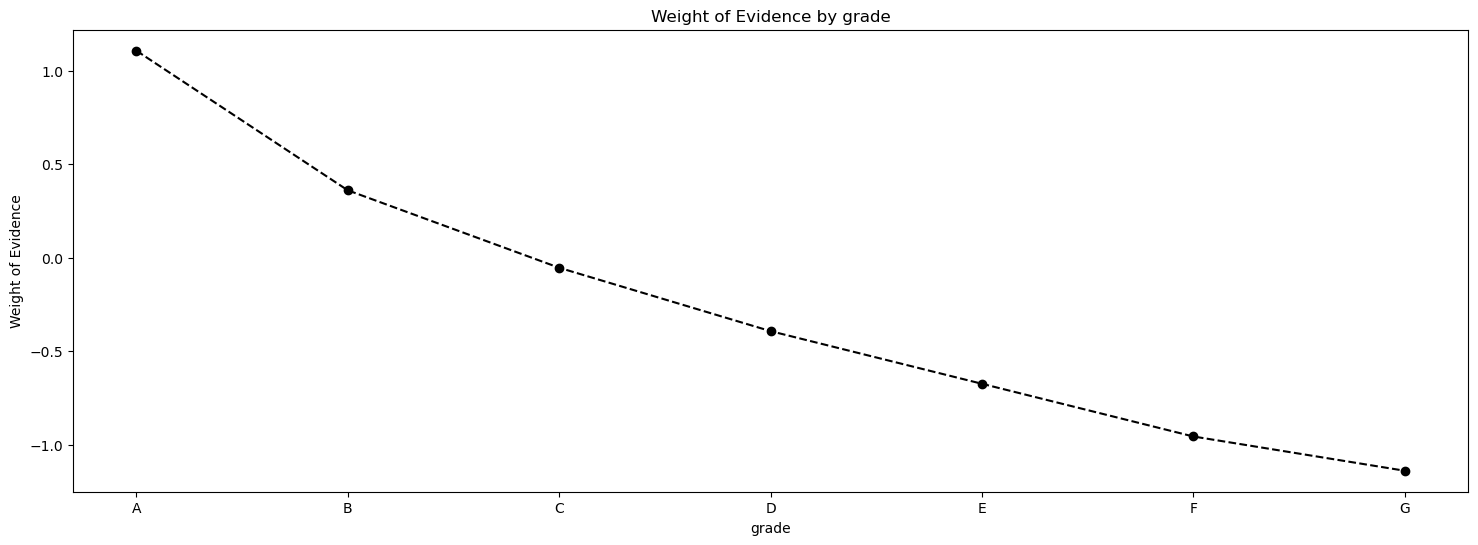

In [35]:
plot_woe(df4)

In [36]:
#now we will create dummy for Grade variab
x=pd.get_dummies(x,columns=['grade'],dtype=int)

In [37]:
# for home ownership variable
df5 = woe_discrete(x, 'home_ownership', y)
df5

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,NaN,inf
1,MORTGAGE,235875,0.905505,0.505860,213586.0,22289.0,0.513244,0.444571,0.143642,0.094495,inf,inf
2,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000160,-0.458076,0.065505,0.601718,inf
3,OTHER,182,0.791209,0.000390,144.0,38.0,0.000346,0.000758,-0.784077,0.048791,0.326001,inf
4,OWN,41704,0.893392,0.089439,37258.0,4446.0,0.089530,0.088679,0.009558,0.102183,0.793635,inf
5,RENT,188473,0.876083,0.404201,165118.0,23355.0,0.396776,0.465833,-0.160455,0.017308,0.170013,inf


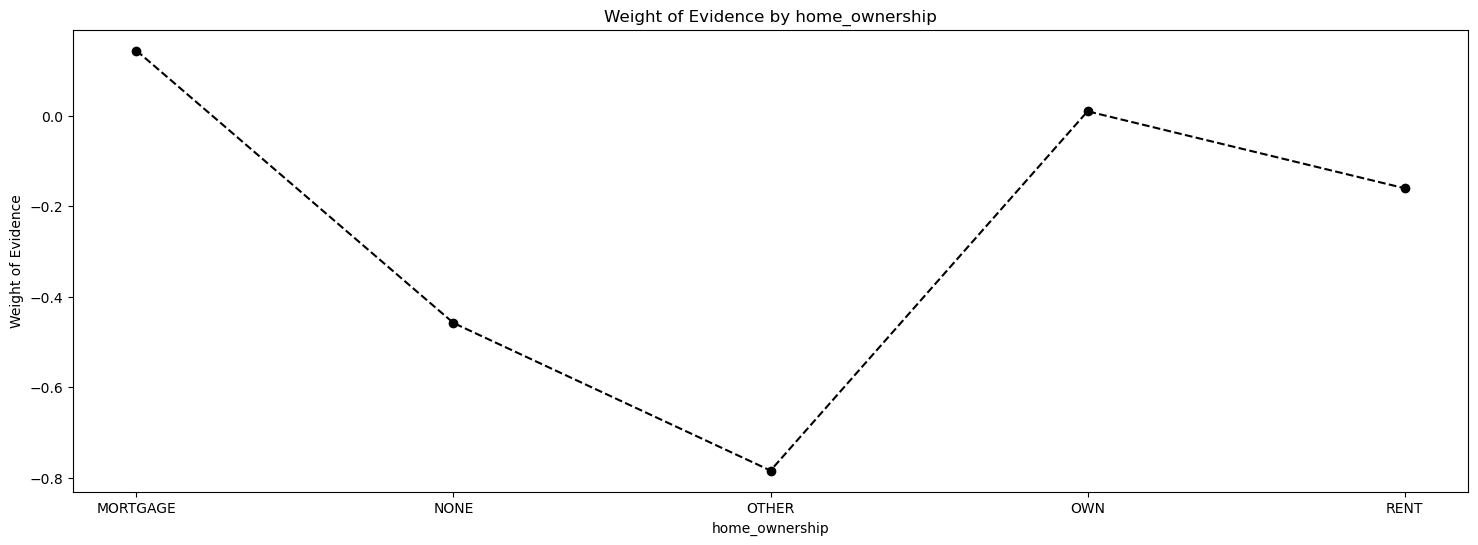

In [38]:
plot_woe(df5)

In [39]:
#first impute dummies then reclassify the data

x=pd.get_dummies(x,columns=['home_ownership'],dtype=int)

In [40]:
#based on the above chart we can reclassify the data into mortgage,own & others
x['home_ownership:RENT_OTHER_NONE_ANY'] = sum([x['home_ownership_RENT'], x['home_ownership_OTHER'],
                                                      x['home_ownership_NONE'],x['home_ownership_ANY']])

In [41]:
x=x.drop(['home_ownership_RENT', 'home_ownership_OTHER', 'home_ownership_NONE', 'home_ownership_ANY'], axis=1)

In [42]:
df6=woe_discrete(x,'verification_status',y)
df6

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Not Verified,148237,0.907203,0.317911,134481.0,13756.0,0.323156,0.274374,0.163644,NaN,NaN,0.020559
1,Source Verified,149993,0.897835,0.321677,134669.0,15324.0,0.323608,0.305649,0.057096,0.009367,0.106548,0.020559
2,Verified,168055,0.874708,0.360413,146999.0,21056.0,0.353236,0.419978,-0.173064,0.023128,0.230159,0.020559


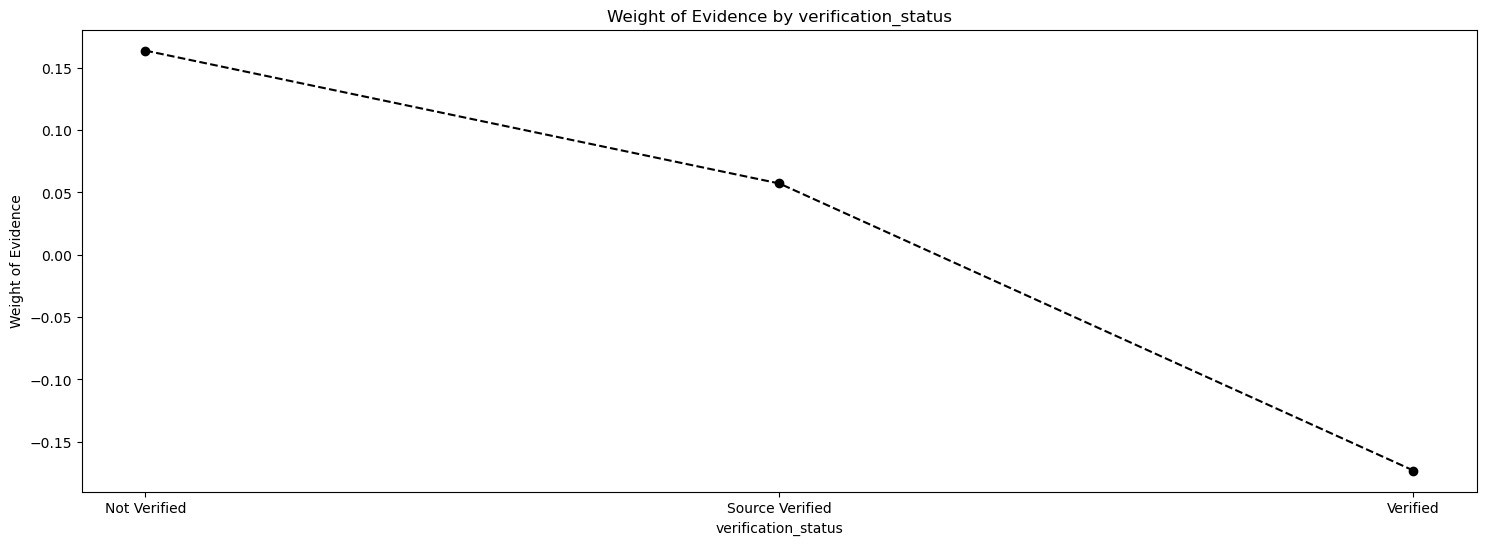

In [43]:
plot_woe(df6)

In [44]:
# create dummies
x=pd.get_dummies(x,columns=['verification_status'],dtype=int)

In [45]:
df7=woe_discrete(x,'purpose',y)
df7

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,car,5397,0.911803,0.011574,4921.0,476.0,0.011825,0.009494,0.219545,NaN,NaN,0.037384
1,credit_card,104157,0.915320,0.223376,95337.0,8820.0,0.229093,0.175921,0.264092,0.003517,0.044547,0.037384
2,debt_consolidation,274195,0.888674,0.588042,243670.0,30525.0,0.585535,0.608844,-0.039035,0.026646,0.303127,0.037384
3,educational,422,0.791469,0.000905,334.0,88.0,0.000803,0.001755,-0.782500,0.097205,0.743465,0.037384
4,home_improvement,26537,0.902966,0.056912,23962.0,2575.0,0.057580,0.051360,0.114316,0.111496,0.896816,0.037384
5,house,2269,0.862494,0.004866,1957.0,312.0,0.004703,0.006223,-0.280139,0.040471,0.394455,0.037384
6,major_purchase,9828,0.905372,0.021077,8898.0,930.0,0.021382,0.018550,0.142093,0.042878,0.422232,0.037384
7,medical,4602,0.867884,0.009870,3994.0,608.0,0.009598,0.012127,-0.233930,0.037489,0.376024,0.037384
8,moving,2994,0.849365,0.006421,2543.0,451.0,0.006111,0.008996,-0.386672,0.018518,0.152741,0.037384
9,other,23690,0.863909,0.050806,20466.0,3224.0,0.049180,0.064305,-0.268162,0.014543,0.118510,0.037384


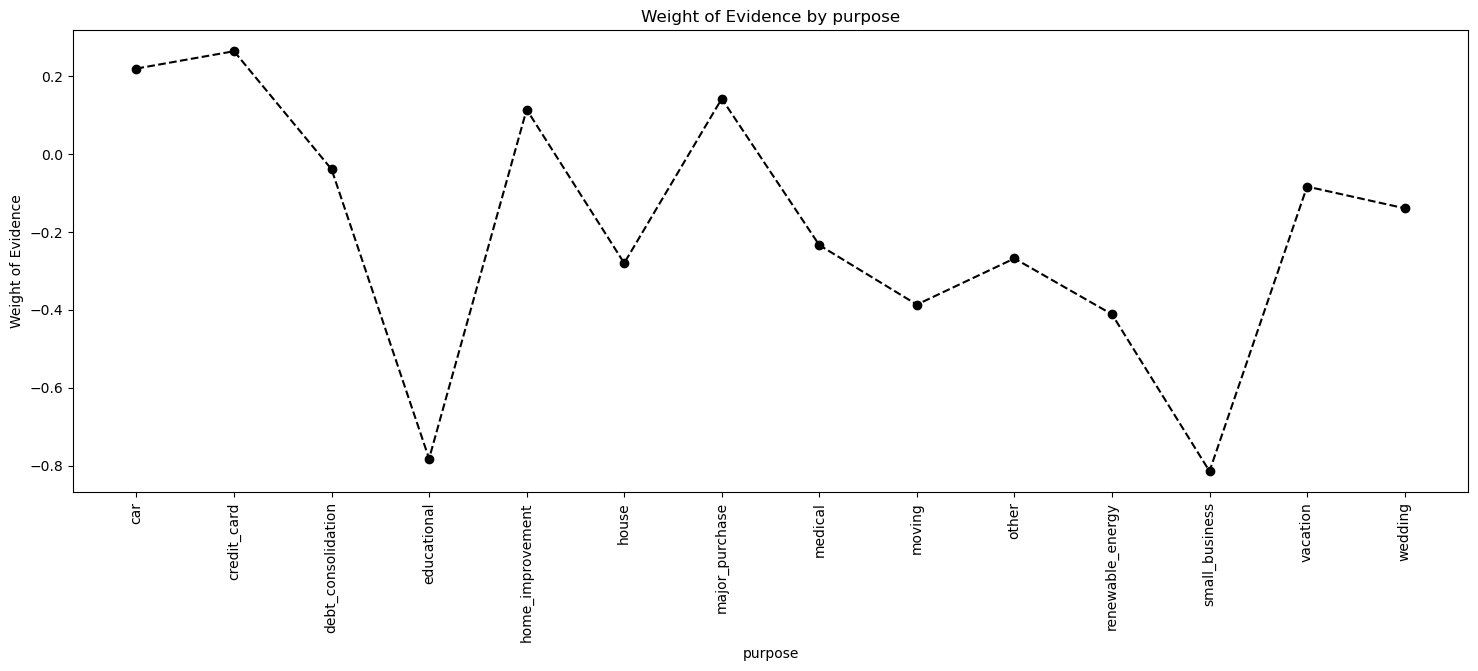

In [46]:
plot_woe(df7,90)

In [47]:
#now we will create dummy variable for purpose
x=pd.get_dummies(x,columns=['purpose'],dtype=int)

In [48]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
x['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([x['purpose_educational'], x['purpose_small_business'],
                                                                 x['purpose_wedding'], x['purpose_renewable_energy'],
                                                                 x['purpose_moving'], x['purpose_house']])
x['purpose:oth__med__vacation'] = sum([x['purpose_other'], x['purpose_medical'],
                                             x['purpose_vacation']])
x['purpose:major_purch__car__home_impr'] = sum([x['purpose_major_purchase'], x['purpose_car'],
                                                        x['purpose_home_improvement']])

In [49]:
x=x.drop(['purpose_educational', 'purpose_small_business', 'purpose_wedding', 'purpose_renewable_energy', 'purpose_moving',
          'purpose_house', 'purpose_major_purchase', 'purpose_car', 'purpose_home_improvement', 'purpose_other', 'purpose_medical', 
         'purpose_vacation'], axis=1)

In [50]:
df8=woe_discrete(x,'addr_state',y)
df8

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,AK,1251,0.914468,0.002683,1144.0,107.0,0.002749,0.002134,0.253153,NaN,NaN,inf
1,AL,5853,0.877328,0.012552,5135.0,718.0,0.012339,0.014321,-0.148939,0.037141,0.402092,inf
2,AR,3488,0.890768,0.007480,3107.0,381.0,0.007466,0.007599,-0.017691,0.013440,0.131248,inf
3,AZ,10712,0.890963,0.022973,9544.0,1168.0,0.022934,0.023297,-0.015684,0.000195,0.002006,inf
4,CA,71450,0.888481,0.153232,63482.0,7968.0,0.152546,0.158928,-0.040981,0.002482,0.025297,inf
5,CO,9739,0.910258,0.020886,8865.0,874.0,0.021302,0.017433,0.200482,0.021776,0.241463,inf
6,CT,7204,0.907135,0.015450,6535.0,669.0,0.015704,0.013344,0.162840,0.003123,0.037642,inf
7,DC,1426,0.933380,0.003058,1331.0,95.0,0.003198,0.001895,0.523505,0.026245,0.360665,inf
8,DE,1272,0.895440,0.002728,1139.0,133.0,0.002737,0.002653,0.031253,0.037940,0.492252,inf
9,FL,31637,0.876632,0.067849,27734.0,3903.0,0.066644,0.077848,-0.155390,0.018808,0.186643,inf


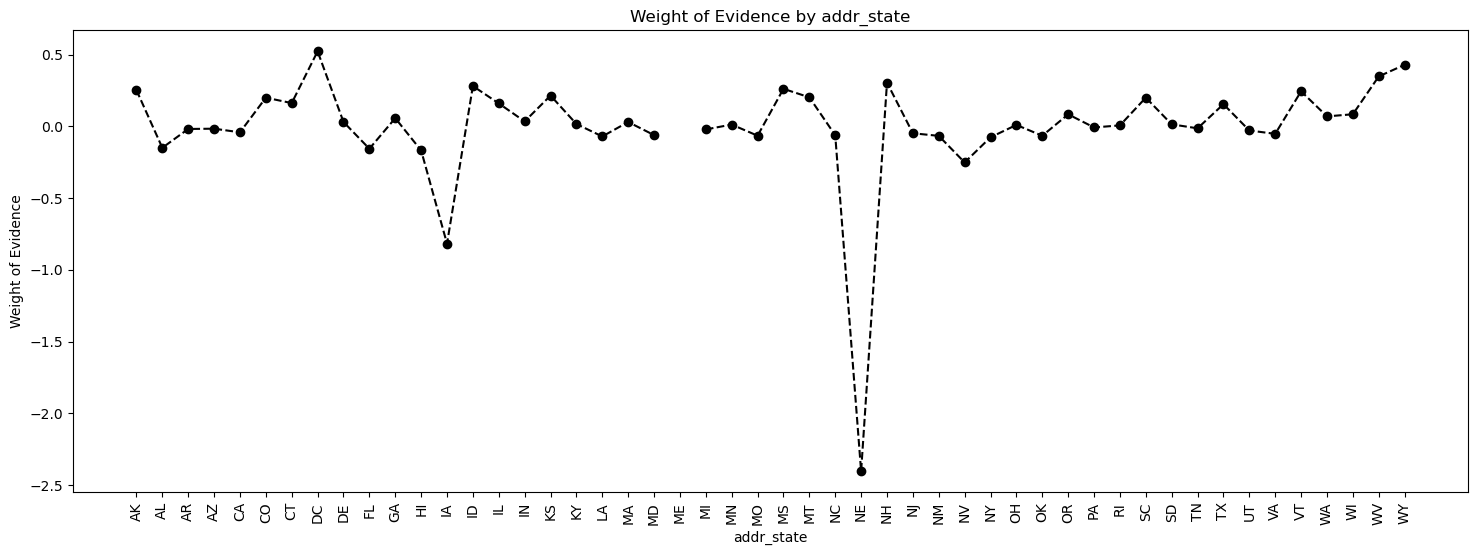

In [51]:
plot_woe(df8,90)

In [52]:
x=pd.get_dummies(x,columns=['addr_state'],dtype=int)

In [53]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

x['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([x['addr_state_NE'],
                                              x['addr_state_IA'], x['addr_state_NV'],
                                              x['addr_state_FL'], x['addr_state_HI'],
                                                          x['addr_state_AL']])

x['addr_state:NM_VA'] = sum([x['addr_state_NM'], x['addr_state_VA']])

x['addr_state:OK_TN_MO_LA_MD_NC'] = sum([x['addr_state_OK'], x['addr_state_TN'],
                                              x['addr_state_MO'], x['addr_state_LA'],
                                              x['addr_state_MD'], x['addr_state_NC']])

x['addr_state:UT_KY_AZ_NJ'] = sum([x['addr_state_UT'], x['addr_state_KY'],
                                              x['addr_state_AZ'], x['addr_state_NJ']])

x['addr_state:AR_MI_PA_OH_MN'] = sum([x['addr_state_AR'], x['addr_state_MI'],
                                              x['addr_state_PA'], x['addr_state_OH'],
                                              x['addr_state_MN']])

x['addr_state:RI_MA_DE_SD_IN'] = sum([x['addr_state_RI'], x['addr_state_MA'],
                                              x['addr_state_DE'], x['addr_state_SD'],
                                              x['addr_state_IN']])

x['addr_state:GA_WA_OR'] = sum([x['addr_state_GA'], x['addr_state_WA'],
                                              x['addr_state_OR']])

x['addr_state:WI_MT'] = sum([x['addr_state_WI'], x['addr_state_MT']])

x['addr_state:IL_CT'] = sum([x['addr_state_IL'], x['addr_state_CT']])

x['addr_state:KS_SC_CO_VT_AK_MS'] = sum([x['addr_state_KS'], x['addr_state_SC'],
                                              x['addr_state_CO'], x['addr_state_VT'],
                                              x['addr_state_AK'], x['addr_state_MS']])

x['addr_state:WV_NH_WY_DC_ME_ID'] = sum([x['addr_state_WV'], x['addr_state_NH'],
                                              x['addr_state_WY'], x['addr_state_DC'],
                                              x['addr_state_ME'], x['addr_state_ID']])


In [54]:
x=x.drop(['addr_state_NE','addr_state_IA', 'addr_state_NV', 'addr_state_FL', 'addr_state_HI', 'addr_state_AL', 'addr_state_NM', 
          'addr_state_VA', 'addr_state_OK', 'addr_state_TN', 'addr_state_MO', 'addr_state_LA', 'addr_state_MD', 'addr_state_NC',
         'addr_state_UT', 'addr_state_KY', 'addr_state_AZ', 'addr_state_NJ', 'addr_state_AR', 'addr_state_MI', 'addr_state_PA', 
         'addr_state_OH', 'addr_state_MN', 'addr_state_RI', 'addr_state_MA', 'addr_state_DE', 'addr_state_SD', 'addr_state_IN', 
         'addr_state_GA', 'addr_state_WA', 'addr_state_OR', 'addr_state_WI', 'addr_state_MT',  'addr_state_IL', 'addr_state_CT', 
         'addr_state_KS', 'addr_state_SC', 'addr_state_CO', 'addr_state_VT', 'addr_state_AK', 'addr_state_MS', 'addr_state_WV',
         'addr_state_NH', 'addr_state_WY',  'addr_state_DC', 'addr_state_ME', 'addr_state_ID'],axis=1)

In [55]:
x.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership:RENT_OTHER_NONE_ANY,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,addr_state_CA,addr_state_NY,addr_state_TX,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID
0,10.65,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,9.0,f,0.0,NaN,36,10,395.0,72.0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,15.27,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,4.0,f,0.0,NaN,60,0,224.0,72.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15.96,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,10.0,f,0.0,NaN,36,10,193.0,72.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,13.49,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,37.0,f,0.0,NaN,36,10,262.0,72.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12.69,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,38.0,f,0.0,NaN,60,1,263.0,72.0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
df9=woe_discrete(x,'initial_list_status',y)
df9

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,303005,0.881200,0.649828,267008.0,35997.0,0.641616,0.717987,-0.112461,NaN,NaN,0.026891
1,w,163280,0.913406,0.350172,149141.0,14139.0,0.358384,0.282013,0.239651,0.032206,0.352112,0.026891


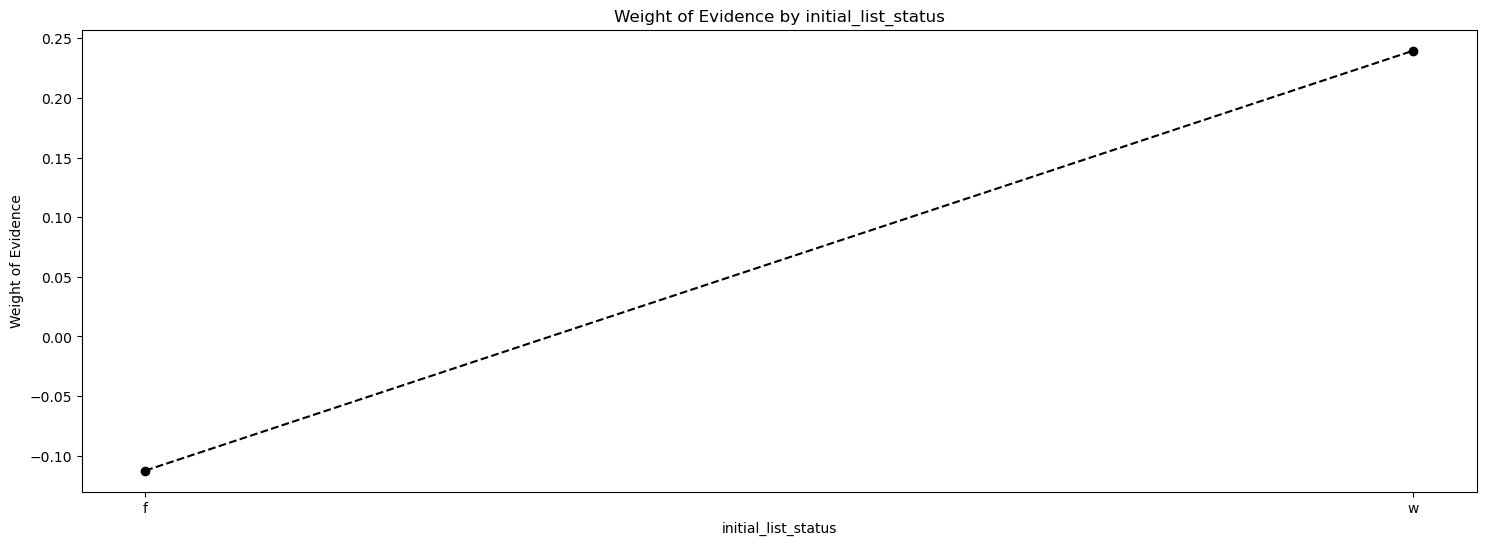

In [57]:
plot_woe(df9)

In [58]:
x=pd.get_dummies(x,columns=['initial_list_status'],dtype=int)

In [59]:
#all discrete variables are encoded now it is the turn for continuous variables

In [60]:
x['term_int'].unique()

array([36, 60])

In [61]:
df10=woe_continuous(x,'term_int',y)
df10

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,337953,0.904365,0.724778,305633.0,32320.0,0.734432,0.644647,0.130395,NaN,NaN,0.037857
1,60,128332,0.861173,0.275222,110516.0,17816.0,0.265568,0.355353,-0.291241,0.043193,0.421635,0.037857


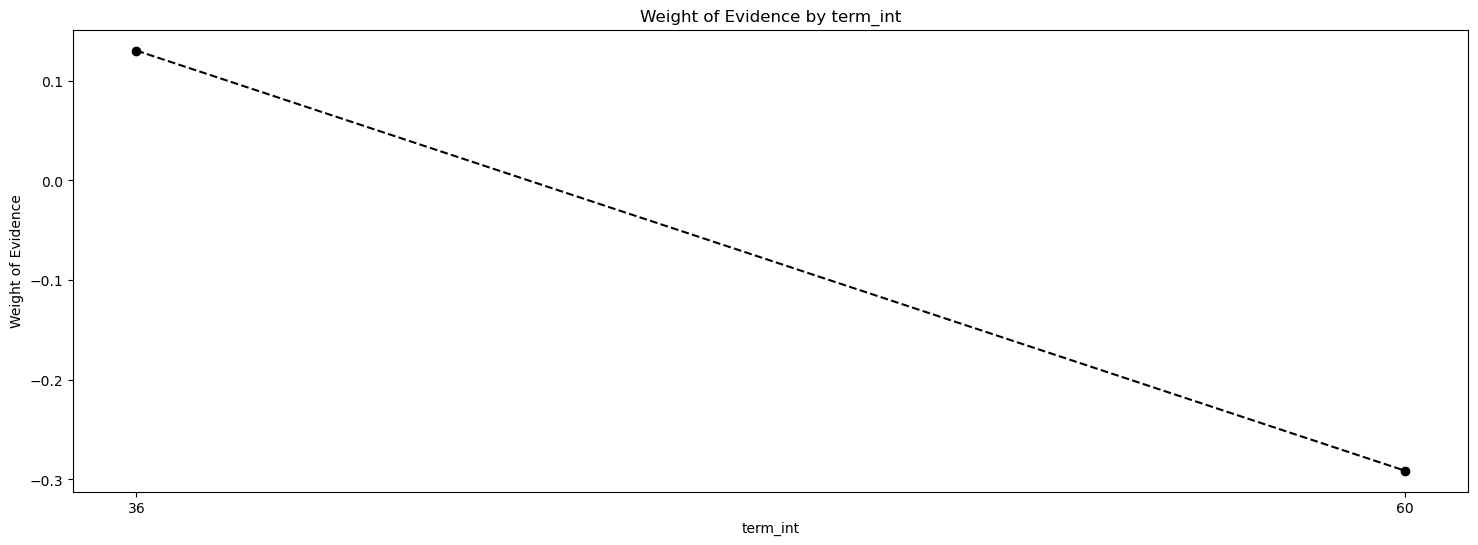

In [62]:
plot_woe(df10)

In [63]:
x['term:36'] = np.where((x['term_int'] == 36), 1, 0)
x['term:60'] = np.where((x['term_int'] == 60), 1, 0)

In [64]:
x=x.drop('term_int',axis=1)

In [65]:
x['emp_length_int'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [66]:
df11=woe_continuous(x,'emp_length_int',y)
df11

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,57273,0.877848,0.122828,50277.0,6996.0,0.120815,0.139540,-0.144095,NaN,NaN,0.006775
1,1,29622,0.890318,0.063528,26373.0,3249.0,0.063374,0.064804,-0.022311,0.012470,0.121784,0.006775
2,2,41373,0.891668,0.088729,36891.0,4482.0,0.088649,0.089397,-0.008406,0.001350,0.013905,0.006775
3,3,36596,0.892311,0.078484,32655.0,3941.0,0.078469,0.078606,-0.001741,0.000642,0.006665,0.006775
4,4,28023,0.891910,0.060098,24994.0,3029.0,0.060060,0.060416,-0.005901,0.000400,0.004160,0.006775
5,5,30774,0.886690,0.065998,27287.0,3487.0,0.065570,0.069551,-0.058935,0.005220,0.053035,0.006775
6,6,26112,0.884498,0.056000,23096.0,3016.0,0.055499,0.060156,-0.080576,0.002193,0.021641,0.006775
7,7,26180,0.890565,0.056146,23315.0,2865.0,0.056026,0.057145,-0.019775,0.006068,0.060801,0.006775
8,8,22395,0.892342,0.048029,19984.0,2411.0,0.048021,0.048089,-0.001414,0.001777,0.018362,0.006775
9,9,17888,0.889814,0.038363,15917.0,1971.0,0.038248,0.039313,-0.027457,0.002528,0.026044,0.006775


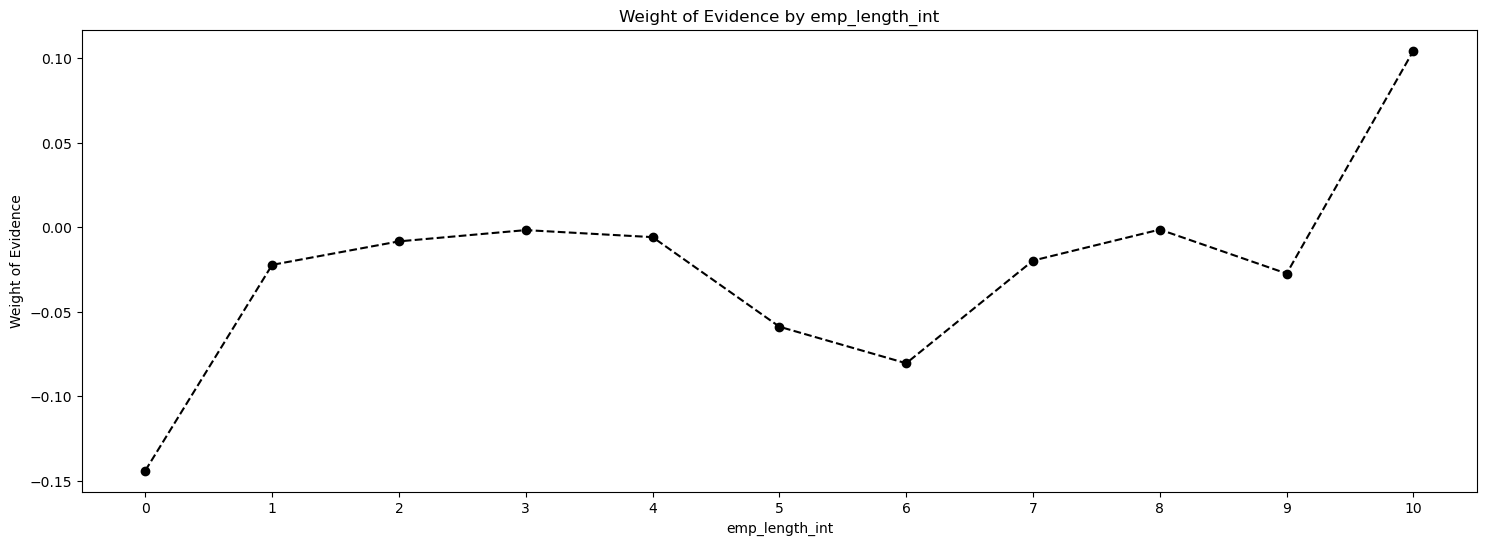

In [67]:
plot_woe(df11)

In [68]:
x['emp_length:0'] = np.where(x['emp_length_int'].isin([0]), 1, 0)
x['emp_length:1'] = np.where(x['emp_length_int'].isin([1]), 1, 0)
x['emp_length:2-4'] = np.where(x['emp_length_int'].isin(range(2, 5)), 1, 0)
x['emp_length:5-6'] = np.where(x['emp_length_int'].isin(range(5, 7)), 1, 0)
x['emp_length:7-9'] = np.where(x['emp_length_int'].isin(range(7, 10)), 1, 0)
x['emp_length:10'] = np.where(x['emp_length_int'].isin([10]), 1, 0)

In [69]:
x=x.drop('emp_length_int',axis=1)

In [70]:
x['mths_since_issue_d'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

In [71]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
x['mths_since_issue_d_factor'] = pd.cut(x['mths_since_issue_d'], 50)

In [72]:
df12=woe_continuous(x,'mths_since_issue_d_factor',y)
df12

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",35361,0.945561,0.075836,33436.0,1925.0,0.080346,0.038396,0.738403,NaN,NaN,0.124058
1,"(37.8, 39.6]",49388,0.930955,0.105918,45978.0,3410.0,0.110484,0.068015,0.485147,0.014607,0.253256,0.124058
2,"(39.6, 41.4]",48120,0.920823,0.103199,44310.0,3810.0,0.106476,0.075993,0.337277,0.010132,0.147870,0.124058
3,"(41.4, 43.2]",36278,0.911517,0.077802,33068.0,3210.0,0.079462,0.064026,0.215991,0.009306,0.121286,0.124058
4,"(43.2, 45.0]",35584,0.904592,0.076314,32189.0,3395.0,0.077350,0.067716,0.133017,0.006925,0.082974,0.124058
5,"(45.0, 46.8]",15269,0.901303,0.032746,13762.0,1507.0,0.033070,0.030058,0.095486,0.003289,0.037531,0.124058
6,"(46.8, 48.6]",30648,0.898917,0.065728,27550.0,3098.0,0.066202,0.061792,0.068942,0.002387,0.026544,0.124058
7,"(48.6, 50.4]",28790,0.889232,0.061743,25601.0,3189.0,0.061519,0.063607,-0.033380,0.009684,0.102322,0.124058
8,"(50.4, 52.2]",25661,0.881883,0.055033,22630.0,3031.0,0.054380,0.060456,-0.105920,0.007349,0.072540,0.124058
9,"(52.2, 54.0]",22809,0.869306,0.048916,19828.0,2981.0,0.047646,0.059458,-0.221468,0.012577,0.115548,0.124058


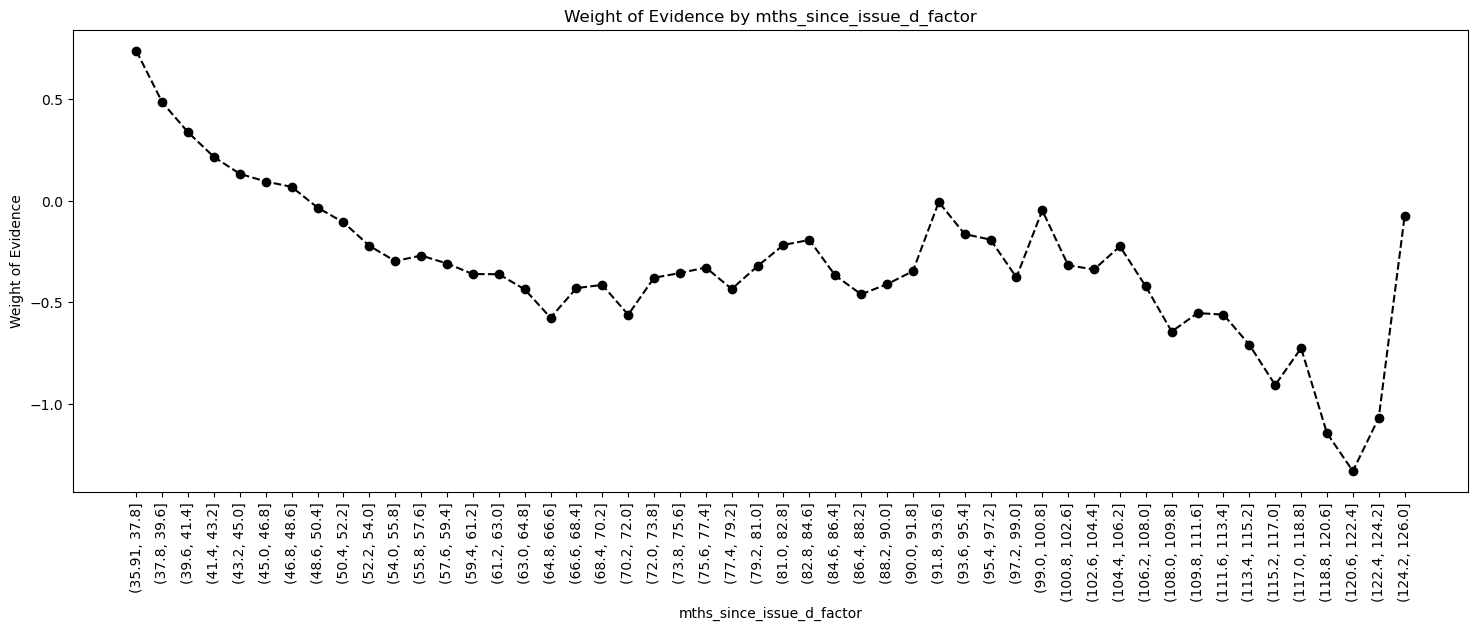

In [73]:
plot_woe(df12,90)

In [74]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
x['mths_since_issue_d:<38'] = np.where(x['mths_since_issue_d'].isin(range(38)), 1, 0)
x['mths_since_issue_d:38-39'] = np.where(x['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
x['mths_since_issue_d:40-41'] = np.where(x['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
x['mths_since_issue_d:42-48'] = np.where(x['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
x['mths_since_issue_d:49-52'] = np.where(x['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
x['mths_since_issue_d:53-64'] = np.where(x['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
x['mths_since_issue_d:65-84'] = np.where(x['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
x['mths_since_issue_d:>84'] = np.where(x['mths_since_issue_d'].isin(range(85, int(x['mths_since_issue_d'].max()))), 1, 0)

In [75]:
x=x.drop(['mths_since_issue_d','mths_since_issue_d_factor'],axis=1)

In [76]:
x['int_rate_factor']=pd.cut(x['int_rate'],50)

In [77]:
df13=woe_continuous(x,'int_rate_factor',y)
df13

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",983,0.963377,0.002108,947.0,36.0,0.002276,0.000718,1.153476,NaN,NaN,0.34557
1,"(5.833, 6.246]",10545,0.980275,0.022615,10337.0,208.0,0.024840,0.004149,1.789643,0.016898,0.636167,0.34557
2,"(6.246, 6.658]",9800,0.972041,0.021017,9526.0,274.0,0.022891,0.005465,1.432348,0.008234,0.357295,0.34557
3,"(6.658, 7.071]",2293,0.969036,0.004918,2222.0,71.0,0.005339,0.001416,1.327179,0.003005,0.105169,0.34557
4,"(7.071, 7.484]",3947,0.978211,0.008465,3861.0,86.0,0.009278,0.001715,1.688030,0.009175,0.360851,0.34557
5,"(7.484, 7.897]",15826,0.963351,0.033941,15246.0,580.0,0.036636,0.011569,1.152740,0.014860,0.535290,0.34557
6,"(7.897, 8.31]",12116,0.950066,0.025984,11511.0,605.0,0.027661,0.012067,0.829526,0.013285,0.323214,0.34557
7,"(8.31, 8.722]",8274,0.966280,0.017745,7995.0,279.0,0.019212,0.005565,1.239056,0.016214,0.409530,0.34557
8,"(8.722, 9.135]",11923,0.938606,0.025570,11191.0,732.0,0.026892,0.014600,0.610781,0.027674,0.628275,0.34557
9,"(9.135, 9.548]",8271,0.967235,0.017738,8000.0,271.0,0.019224,0.005405,1.268774,0.028629,0.657993,0.34557


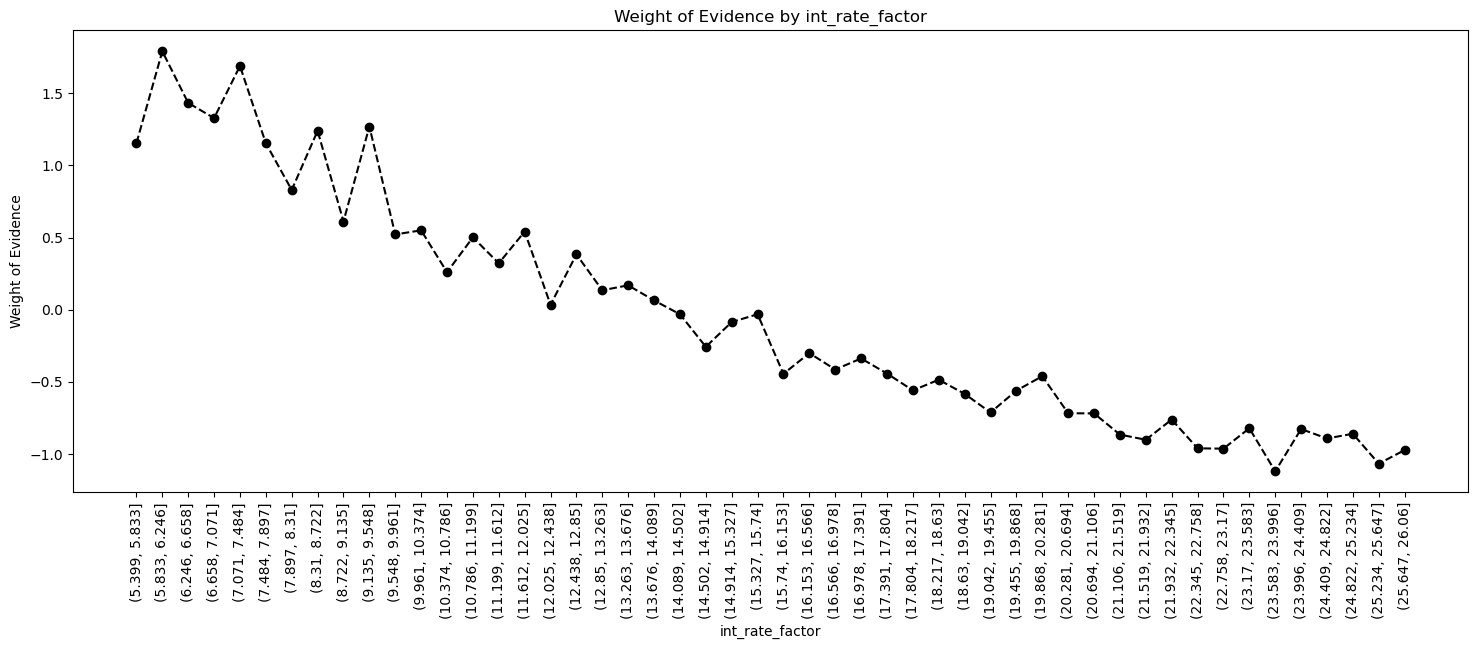

In [78]:
plot_woe(df13,90)

In [79]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
x['int_rate:<9.548'] = np.where((x['int_rate'] <= 9.548), 1, 0)
x['int_rate:9.548-12.025'] = np.where((x['int_rate'] > 9.548) & (x['int_rate'] <= 12.025), 1, 0)
x['int_rate:12.025-15.74'] = np.where((x['int_rate'] > 12.025) & (x['int_rate'] <= 15.74), 1, 0)
x['int_rate:15.74-20.281'] = np.where((x['int_rate'] > 15.74) & (x['int_rate'] <= 20.281), 1, 0)
x['int_rate:>20.281'] = np.where((x['int_rate'] > 20.281), 1, 0)

In [80]:
x=x.drop(['int_rate','int_rate_factor'],axis=1)

In [81]:
x['mths_since_earliest_cr_line_factor'] = pd.cut(x['mths_since_earliest_cr_line'], 50)

In [82]:
df14=woe_continuous(x,'mths_since_earliest_cr_line_factor',y)
df14

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",29,0.896552,0.000062,26.0,3.0,0.000062,0.000060,0.043180,NaN,NaN,0.015677
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015677
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015677
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015677
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015677
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015677
6,"(70.44, 82.18]",904,0.909292,0.001939,822.0,82.0,0.001975,0.001636,0.188717,NaN,NaN,0.015677
7,"(82.18, 93.92]",2437,0.893311,0.005226,2177.0,260.0,0.005231,0.005186,0.008717,0.015981,0.180000,0.015677
8,"(93.92, 105.66]",3532,0.858720,0.007575,3033.0,499.0,0.007288,0.009953,-0.311603,0.034591,0.320320,0.015677
9,"(105.66, 117.4]",6360,0.871855,0.013640,5545.0,815.0,0.013325,0.016256,-0.198840,0.013135,0.112762,0.015677


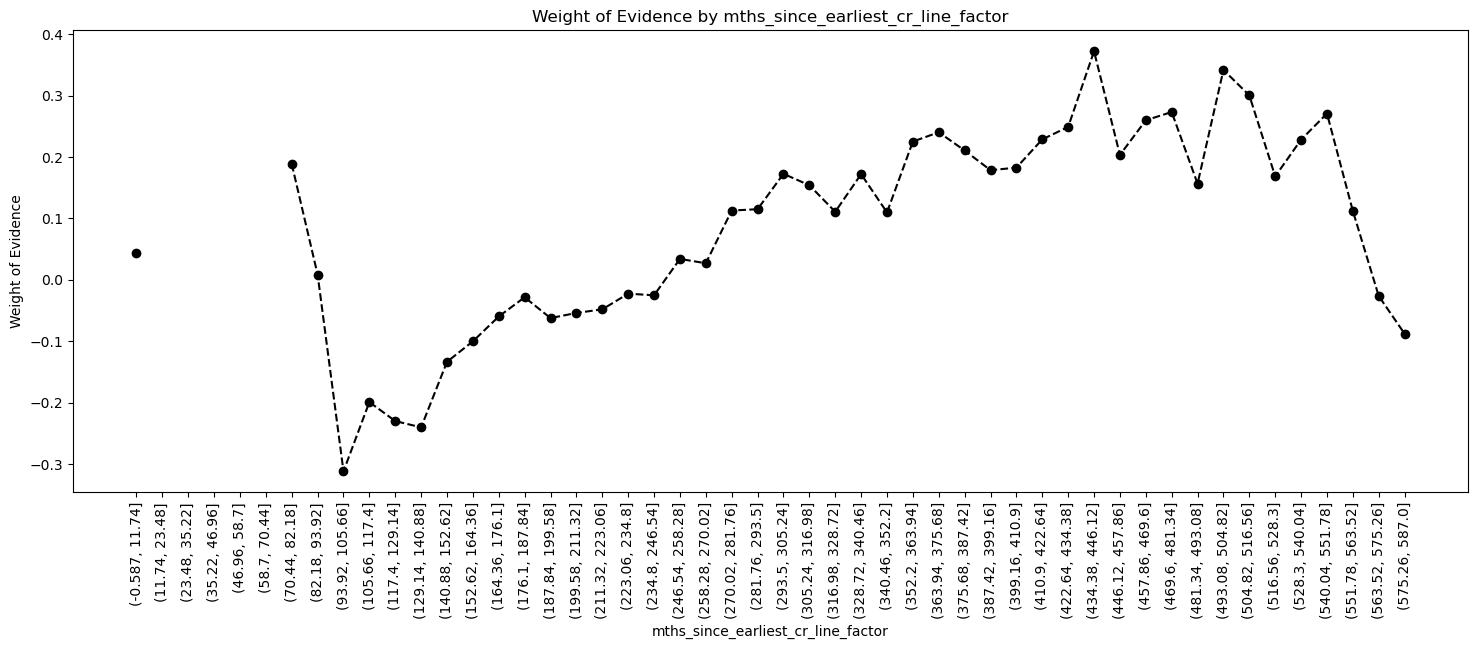

In [83]:
plot_woe(df14,90)

In [84]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
x['mths_since_earliest_cr_line:<140'] = np.where(x['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
x['mths_since_earliest_cr_line:141-164'] = np.where(x['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
x['mths_since_earliest_cr_line:165-247'] = np.where(x['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
x['mths_since_earliest_cr_line:248-270'] = np.where(x['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
x['mths_since_earliest_cr_line:271-352'] = np.where(x['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
x['mths_since_earliest_cr_line:>352'] = np.where(x['mths_since_earliest_cr_line'].isin(range(353, int(x['mths_since_earliest_cr_line'].max()))), 1, 0)

In [85]:
x=x.drop(['mths_since_earliest_cr_line','mths_since_earliest_cr_line_factor'],axis=1)

In [86]:
df15=woe_continuous(x,'delinq_2yrs',y)
df15

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,382983,0.892303,0.821350,341737.0,41246.0,0.821189,0.822682,-0.001817,NaN,NaN,inf
1,1.0,56224,0.894493,0.120579,50292.0,5932.0,0.120851,0.118318,0.021181,0.002190,0.022997,inf
2,2.0,16310,0.890803,0.034979,14529.0,1781.0,0.034913,0.035523,-0.017332,0.003690,0.038513,inf
3,3.0,5684,0.887755,0.012190,5046.0,638.0,0.012125,0.012725,-0.048291,0.003048,0.030959,inf
4,4.0,2378,0.898234,0.005100,2136.0,242.0,0.005133,0.004827,0.061448,0.010479,0.109740,inf
5,5.0,1236,0.889968,0.002651,1100.0,136.0,0.002643,0.002713,-0.025893,0.008266,0.087342,inf
6,6.0,629,0.899841,0.001349,566.0,63.0,0.001360,0.001257,0.079155,0.009873,0.105049,inf
7,7.0,346,0.878613,0.000742,304.0,42.0,0.000731,0.000838,-0.136946,0.021228,0.216101,inf
8,8.0,177,0.909605,0.000380,161.0,16.0,0.000387,0.000319,0.192512,0.030992,0.329458,inf
9,9.0,111,0.918919,0.000238,102.0,9.0,0.000245,0.000180,0.311444,0.009314,0.118933,inf


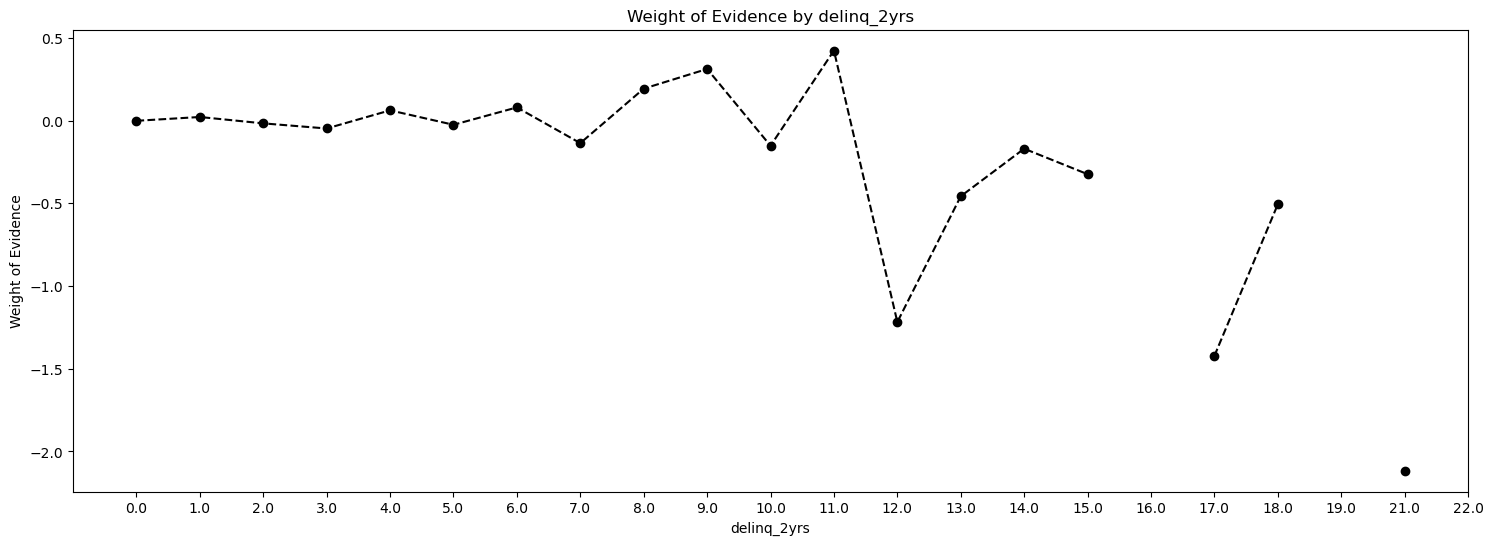

In [87]:
plot_woe(df15)

In [88]:
# Categories: 0, 1-3, >=4
x['delinq_2yrs:0'] = np.where((x['delinq_2yrs'] == 0), 1, 0)
x['delinq_2yrs:1-3'] = np.where((x['delinq_2yrs'] >= 1) & (x['delinq_2yrs'] <= 3), 1, 0)
x['delinq_2yrs:>=4'] = np.where((x['delinq_2yrs'] >= 9), 1, 0)

In [89]:
x=x.drop('delinq_2yrs',axis=1)

In [90]:
df16=woe_continuous(x,'inq_last_6mths',y)
df16

C:\Users\arind\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,241527,0.910387,0.517981,219883.0,21644.0,0.528376,0.431706,0.202063,NaN,NaN,inf
1,1.0,130148,0.886306,0.279117,115351.0,14797.0,0.277187,0.295137,-0.062749,0.024080,0.264812,inf
2,2.0,57825,0.865387,0.124012,50041.0,7784.0,0.120248,0.155258,-0.255532,0.020919,0.192783,inf
3,3.0,25126,0.843151,0.053885,21185.0,3941.0,0.050907,0.078606,-0.434445,0.022236,0.178913,inf
4,4.0,7241,0.849606,0.015529,6152.0,1089.0,0.014783,0.021721,-0.384787,0.006456,0.049659,inf
5,5.0,2768,0.831286,0.005936,2301.0,467.0,0.005529,0.009315,-0.521534,0.018320,0.136748,inf
6,6.0,1188,0.788721,0.002548,937.0,251.0,0.002252,0.005006,-0.799074,0.042566,0.277539,inf
7,7.0,195,0.651282,0.000418,127.0,68.0,0.000305,0.001356,-1.491625,0.137438,0.692551,inf
8,8.0,122,0.622951,0.000262,76.0,46.0,0.000183,0.000918,-1.614212,0.028331,0.122587,inf
9,9.0,50,0.640000,0.000107,32.0,18.0,0.000077,0.000359,-1.540940,0.017049,0.073272,inf


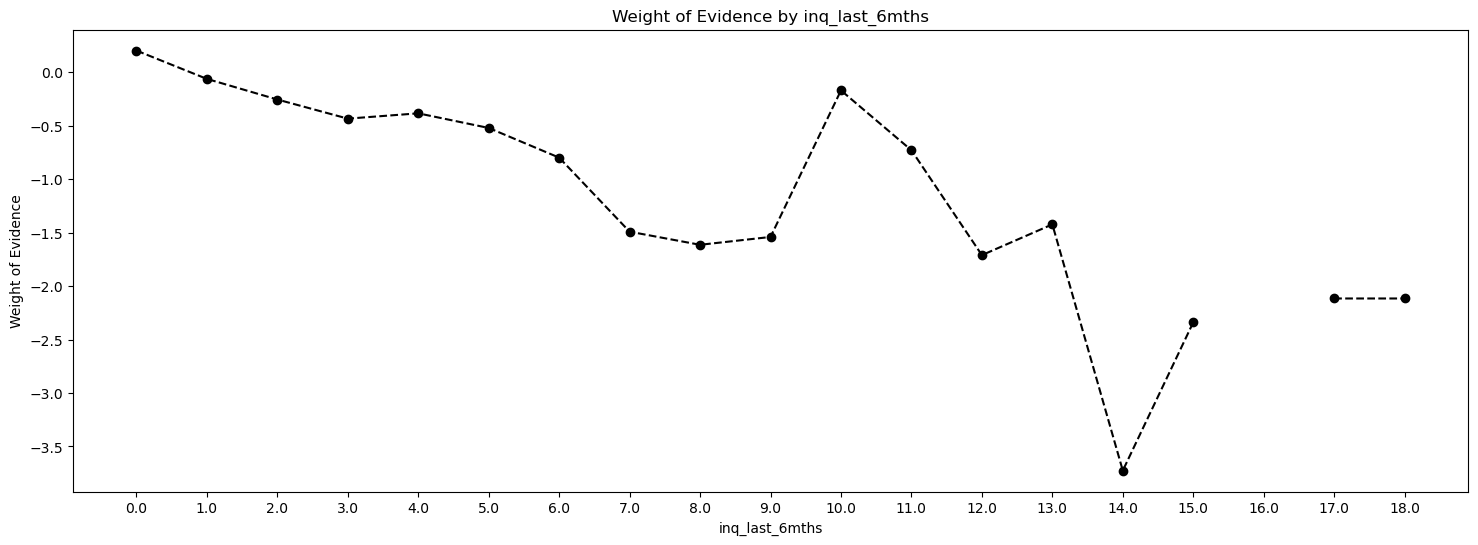

In [91]:
plot_woe(df16)

In [92]:
# Categories: 0, 1 - 2, 3 - 6, > 6
x['inq_last_6mths:0'] = np.where((x['inq_last_6mths'] == 0), 1, 0)
x['inq_last_6mths:1-2'] = np.where((x['inq_last_6mths'] >= 1) & (x['inq_last_6mths'] <= 2), 1, 0)
x['inq_last_6mths:3-6'] = np.where((x['inq_last_6mths'] >= 3) & (x['inq_last_6mths'] <= 6), 1, 0)
x['inq_last_6mths:>6'] = np.where((x['inq_last_6mths'] > 6), 1, 0)

In [93]:
x=x.drop('inq_last_6mths',axis=1)

In [94]:
df17=woe_continuous(x,'open_acc',y)
df17

C:\Users\arind\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,36,0.805556,0.000077,29.0,7.0,0.000070,0.000140,-0.694918,NaN,NaN,inf
1,1.0,142,0.873239,0.000305,124.0,18.0,0.000298,0.000359,-0.186394,0.067684,0.508524,inf
2,2.0,1790,0.845810,0.003839,1514.0,276.0,0.003638,0.005505,-0.414194,0.027429,0.227800,inf
3,3.0,5500,0.871091,0.011795,4791.0,709.0,0.011513,0.014142,-0.205665,0.025281,0.208529,inf
4,4.0,12588,0.892676,0.026996,11237.0,1351.0,0.027002,0.026947,0.002063,0.021585,0.207728,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
57,61.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
58,62.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
59,75.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
60,76.0,2,0.000000,0.000004,0.0,2.0,0.000000,0.000040,-inf,1.000000,inf,inf


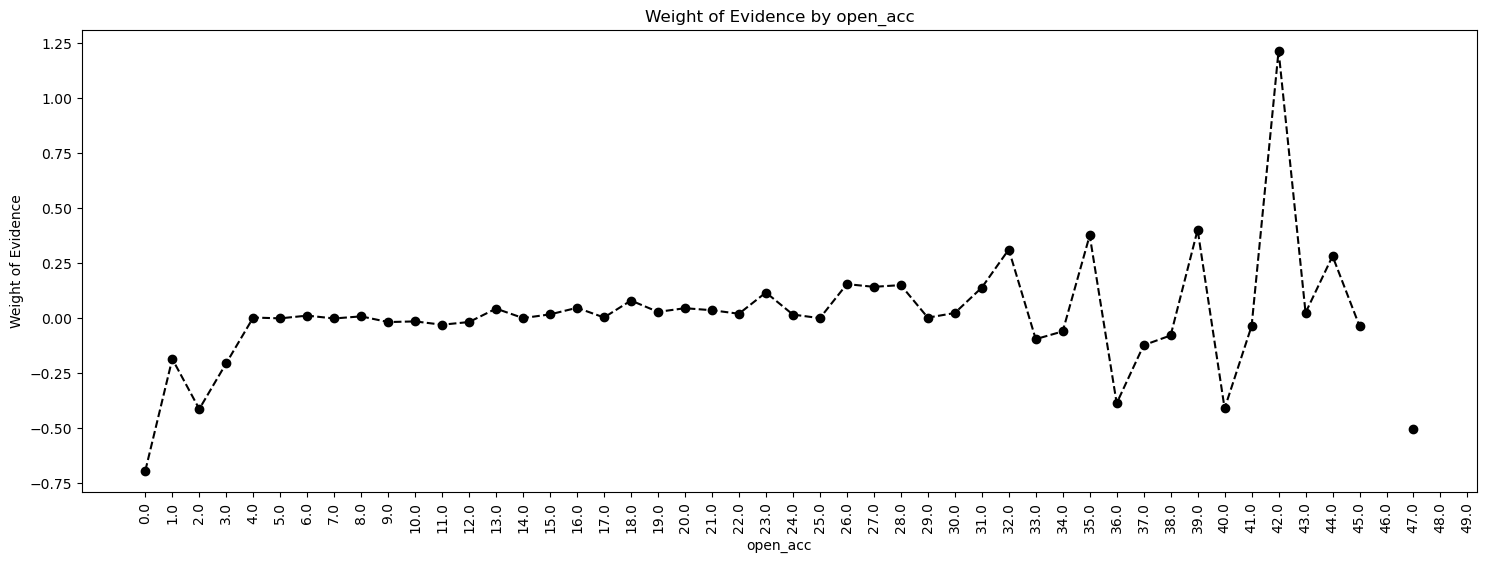

In [95]:
plot_woe(df17,90)

In [96]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
x['open_acc:0'] = np.where((x['open_acc'] == 0), 1, 0)
x['open_acc:1-3'] = np.where((x['open_acc'] >= 1) & (x['open_acc'] <= 3), 1, 0)
x['open_acc:4-12'] = np.where((x['open_acc'] >= 4) & (x['open_acc'] <= 12), 1, 0)
x['open_acc:13-17'] = np.where((x['open_acc'] >= 13) & (x['open_acc'] <= 17), 1, 0)
x['open_acc:18-22'] = np.where((x['open_acc'] >= 18) & (x['open_acc'] <= 22), 1, 0)
x['open_acc:23-25'] = np.where((x['open_acc'] >= 23) & (x['open_acc'] <= 25), 1, 0)
x['open_acc:26-30'] = np.where((x['open_acc'] >= 26) & (x['open_acc'] <= 30), 1, 0)
x['open_acc:>=31'] = np.where((x['open_acc'] >= 31), 1, 0)

In [97]:
x=x.drop('open_acc',axis=1)

In [98]:
df18=woe_continuous(x,'pub_rec',y)
df18

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,404922,0.891495,0.868400,360986.0,43936.0,0.867444,0.876336,-0.010199,NaN,NaN,inf
1,1.0,53051,0.897212,0.113774,47598.0,5453.0,0.114377,0.108764,0.050321,0.005717,0.060520,inf
2,2.0,5624,0.906294,0.012061,5097.0,527.0,0.012248,0.010511,0.152903,0.009082,0.102582,inf
3,3.0,1611,0.918684,0.003455,1480.0,131.0,0.003556,0.002613,0.308296,0.012390,0.155393,inf
4,4.0,520,0.913462,0.001115,475.0,45.0,0.001141,0.000898,0.240348,0.005223,0.067948,inf
5,5.0,276,0.909420,0.000592,251.0,25.0,0.000603,0.000499,0.190273,0.004041,0.050075,inf
6,6.0,136,0.926471,0.000292,126.0,10.0,0.000303,0.000199,0.417393,0.017050,0.227120,inf
7,7.0,62,0.919355,0.000133,57.0,5.0,0.000137,0.000100,0.317309,0.007116,0.100083,inf
8,8.0,29,0.965517,0.000062,28.0,1.0,0.000067,0.000020,1.215900,0.046162,0.898591,inf
9,9.0,16,0.812500,0.000034,13.0,3.0,0.000031,0.000060,-0.649967,0.153017,1.865867,inf


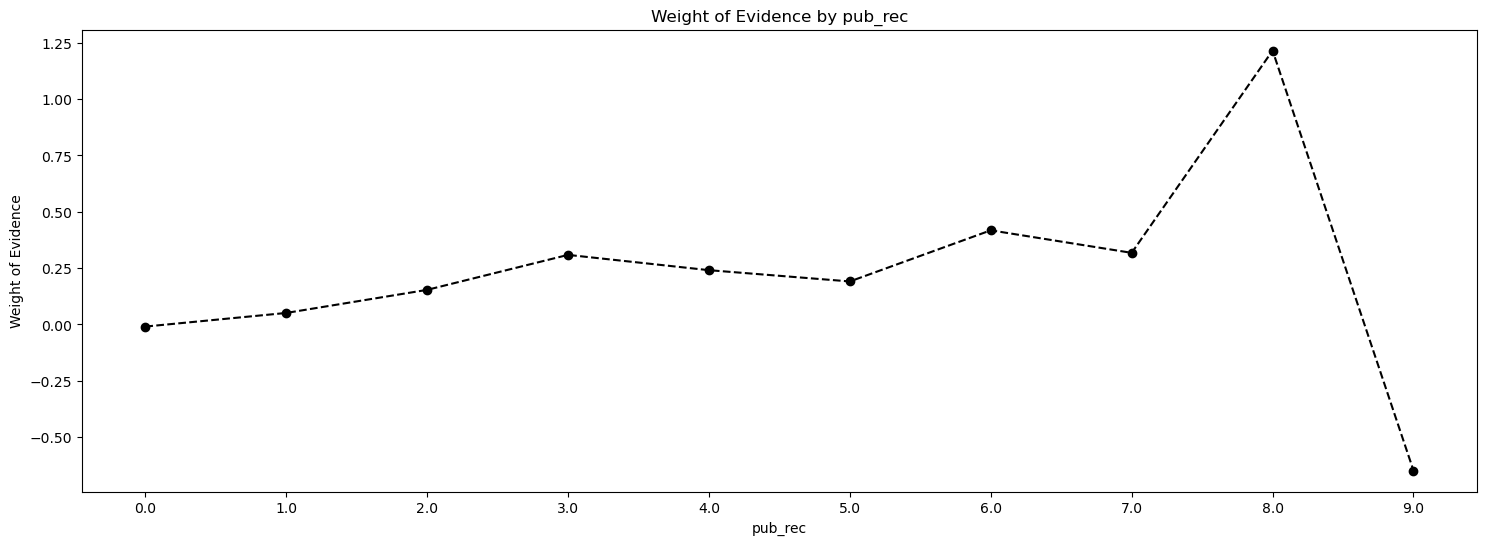

In [99]:
plot_woe(df18)

In [100]:
# Categories '0-2', '3-4', '>=5'
x['pub_rec:0-2'] = np.where((x['pub_rec'] >= 0) & (x['pub_rec'] <= 2), 1, 0)
x['pub_rec:3-4'] = np.where((x['pub_rec'] >= 3) & (x['pub_rec'] <= 4), 1, 0)
x['pub_rec:>=5'] = np.where((x['pub_rec'] >= 5), 1, 0)

In [101]:
x=x.drop('pub_rec',axis=1)

In [102]:
x['total_acc_factor']=pd.cut(x['total_acc'],50)

In [103]:
df19=woe_continuous(x,'total_acc_factor',y)
df19

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",584,0.803082,0.001252,469.0,115.0,0.001127,0.002294,-0.710633,NaN,NaN,inf
1,"(3.12, 6.24]",7503,0.863788,0.016091,6481.0,1022.0,0.015574,0.020385,-0.269191,0.060706,0.441443,inf
2,"(6.24, 9.36]",18762,0.874640,0.040237,16410.0,2352.0,0.039433,0.046912,-0.173679,0.010852,0.095512,inf
3,"(9.36, 12.48]",31457,0.881648,0.067463,27734.0,3723.0,0.066644,0.074258,-0.108175,0.007008,0.065504,inf
4,"(12.48, 15.6]",41940,0.884716,0.089945,37105.0,4835.0,0.089163,0.096438,-0.078433,0.003068,0.029741,inf
5,"(15.6, 18.72]",48554,0.889566,0.104129,43192.0,5362.0,0.103790,0.106949,-0.029986,0.004850,0.048448,inf
6,"(18.72, 21.84]",50869,0.889461,0.109094,45246.0,5623.0,0.108725,0.112155,-0.031055,0.000105,0.001069,inf
7,"(21.84, 24.96]",50134,0.893306,0.107518,44785.0,5349.0,0.107618,0.106690,0.008660,0.003845,0.039715,inf
8,"(24.96, 28.08]",59229,0.897213,0.127023,53141.0,6088.0,0.127697,0.121430,0.050325,0.003907,0.041666,inf
9,"(28.08, 31.2]",37156,0.898751,0.079685,33394.0,3762.0,0.080245,0.075036,0.067121,0.001539,0.016796,inf


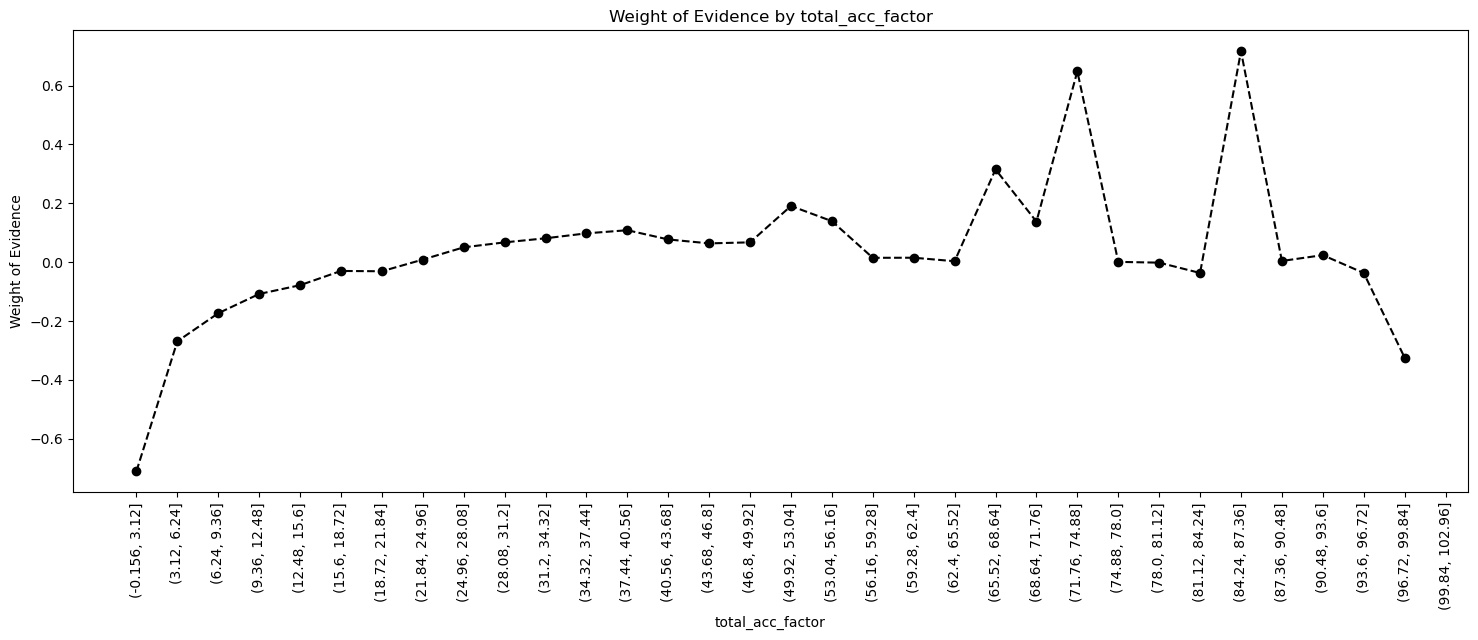

In [104]:
plot_woe(df19,90)

In [105]:
# Categories: '<=27', '28-51', '>51'
x['total_acc:<=27'] = np.where((x['total_acc'] <= 27), 1, 0)
x['total_acc:28-51'] = np.where((x['total_acc'] >= 28) & (x['total_acc'] <= 51), 1, 0)
x['total_acc:>=52'] = np.where((x['total_acc'] >= 52), 1, 0)

In [106]:
x=x.drop(['total_acc','total_acc_factor'],axis=1)

In [107]:
df20=woe_continuous(x,'acc_now_delinq',y)
df20

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,464553,0.892464,0.996286,414597.0,49956.0,0.996271,0.996410,-0.000140,NaN,NaN,inf
1,1.0,1623,0.896488,0.003481,1455.0,168.0,0.003496,0.003351,0.042493,0.004024,0.042633,inf
2,2.0,92,0.902174,0.000197,83.0,9.0,0.000199,0.000180,0.105312,0.005686,0.062819,inf
3,3.0,11,0.818182,0.000024,9.0,2.0,0.000022,0.000040,-0.612227,0.083992,0.717539,inf
4,4.0,4,1.000000,0.000009,4.0,0.0,0.000010,0.000000,inf,0.181818,inf,inf
5,5.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000020,-2.116304,0.500000,inf,inf


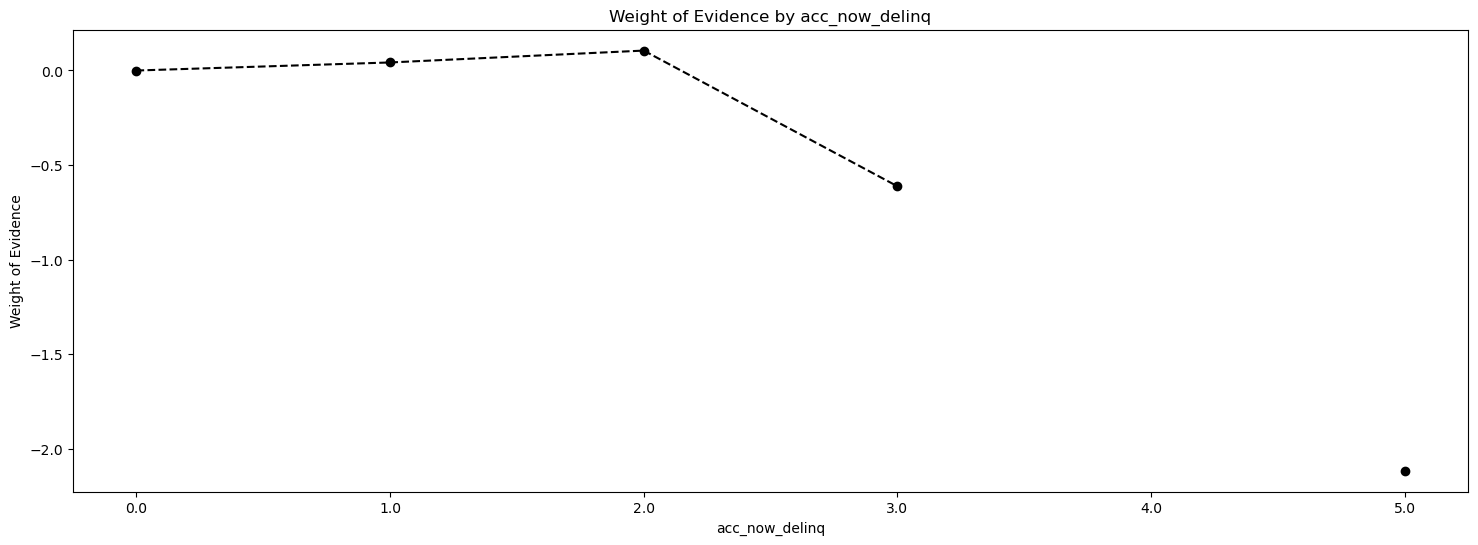

In [108]:
plot_woe(df20)

In [109]:
# Categories: '0', '>=1'
x['acc_now_delinq:0'] = np.where((x['acc_now_delinq'] == 0), 1, 0)
x['acc_now_delinq:>=1'] = np.where((x['acc_now_delinq'] >= 1), 1, 0)

In [110]:
x=x.drop('acc_now_delinq',axis=1)

In [111]:
x['total_rev_hi_lim_factor']=pd.cut(x['total_rev_hi_lim'],2000)

In [112]:
df21=woe_continuous(x,'total_rev_hi_lim_factor',y)
df21

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)
C:\Users\arind\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",12531,0.877584,0.031643,10997.0,1534.0,0.030823,0.039098,-0.237790,NaN,NaN,inf
1,"(5000.0, 9999.999]",45194,0.885826,0.114124,40034.0,5160.0,0.112211,0.131515,-0.158741,0.008242,0.079049,inf
2,"(9999.999, 14999.998]",57786,0.889385,0.145921,51394.0,6392.0,0.144052,0.162916,-0.123059,0.003559,0.035682,inf
3,"(14999.998, 19999.998]",54864,0.890475,0.138542,48855.0,6009.0,0.136935,0.153154,-0.111935,0.001090,0.011124,inf
4,"(19999.998, 24999.997]",45783,0.897320,0.115611,41082.0,4701.0,0.115149,0.119816,-0.039739,0.006845,0.072196,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


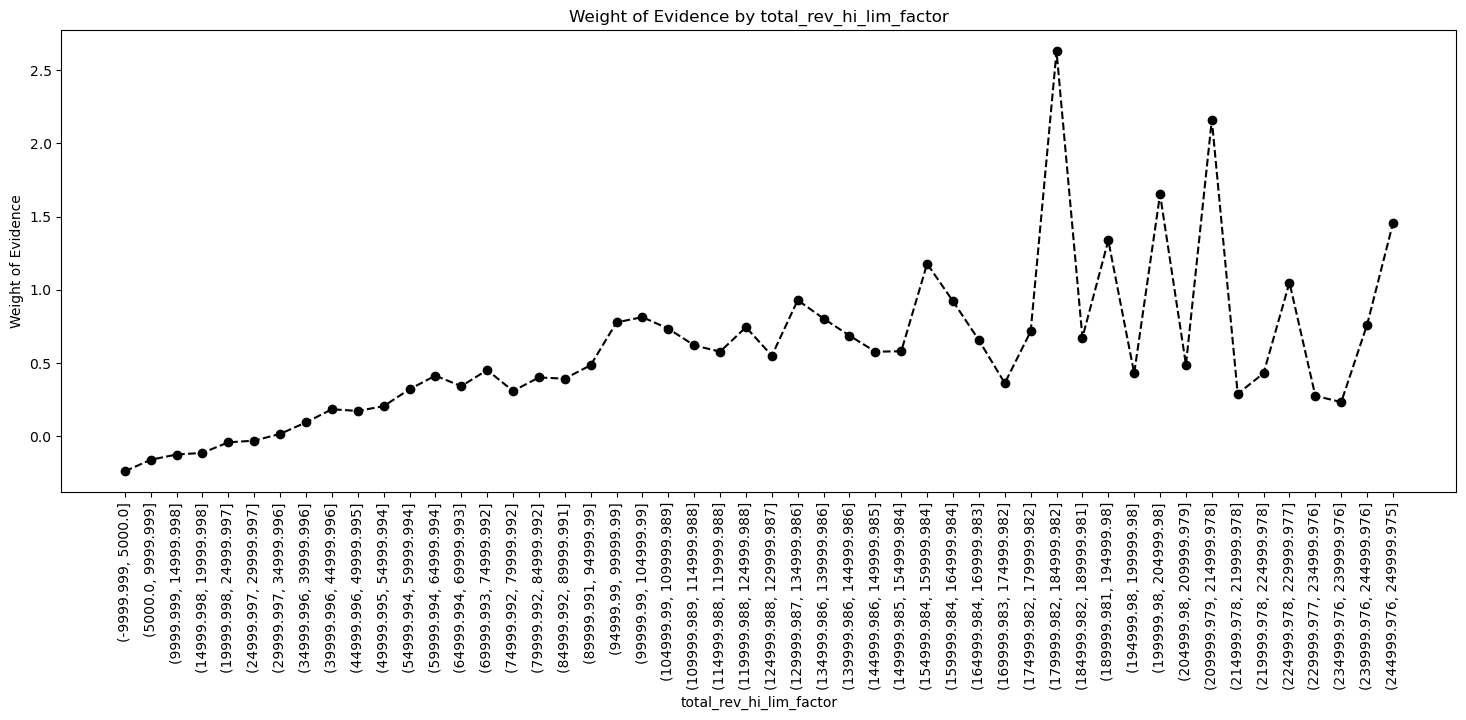

In [113]:
plot_woe(df21.iloc[:50,:],90)

In [114]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
x['total_rev_hi_lim:<=5K'] = np.where((x['total_rev_hi_lim'] <= 5000), 1, 0)
x['total_rev_hi_lim:5K-10K'] = np.where((x['total_rev_hi_lim'] > 5000) & (x['total_rev_hi_lim'] <= 10000), 1, 0)
x['total_rev_hi_lim:10K-20K'] = np.where((x['total_rev_hi_lim'] > 10000) & (x['total_rev_hi_lim'] <= 20000), 1, 0)
x['total_rev_hi_lim:20K-30K'] = np.where((x['total_rev_hi_lim'] > 20000) & (x['total_rev_hi_lim'] <= 30000), 1, 0)
x['total_rev_hi_lim:30K-40K'] = np.where((x['total_rev_hi_lim'] > 30000) & (x['total_rev_hi_lim'] <= 40000), 1, 0)
x['total_rev_hi_lim:40K-55K'] = np.where((x['total_rev_hi_lim'] > 40000) & (x['total_rev_hi_lim'] <= 55000), 1, 0)
x['total_rev_hi_lim:55K-95K'] = np.where((x['total_rev_hi_lim'] > 55000) & (x['total_rev_hi_lim'] <= 95000), 1, 0)
x['total_rev_hi_lim:>95K'] = np.where((x['total_rev_hi_lim'] > 95000), 1, 0)

In [115]:
x=x.drop(['total_rev_hi_lim','total_rev_hi_lim_factor'],axis=1)

In [116]:
x['annual_inc_factor']=pd.cut(x['annual_inc'],100)

In [117]:
df22=woe_continuous(x,'annual_inc_factor',y)
df22

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 76877.04]",306443,0.879371,0.657201,269477.0,36966.0,0.647549,0.737315,-0.129820,NaN,NaN,inf
1,"(76877.04, 151858.08]",139400,0.915925,0.298959,127680.0,11720.0,0.306813,0.233764,0.271926,0.036555,0.401746,inf
2,"(151858.08, 226839.12]",14866,0.928360,0.031882,13801.0,1065.0,0.033164,0.021242,0.445462,0.012435,0.173536,inf
3,"(226839.12, 301820.16]",3559,0.927789,0.007633,3302.0,257.0,0.007935,0.005126,0.436903,0.000571,0.008559,inf
4,"(301820.16, 376801.2]",867,0.935409,0.001859,811.0,56.0,0.001949,0.001117,0.556612,0.007621,0.119709,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(7125094.8, 7200075.84]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,NaN,inf
96,"(7200075.84, 7275056.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7275056.88, 7350037.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7350037.92, 7425018.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


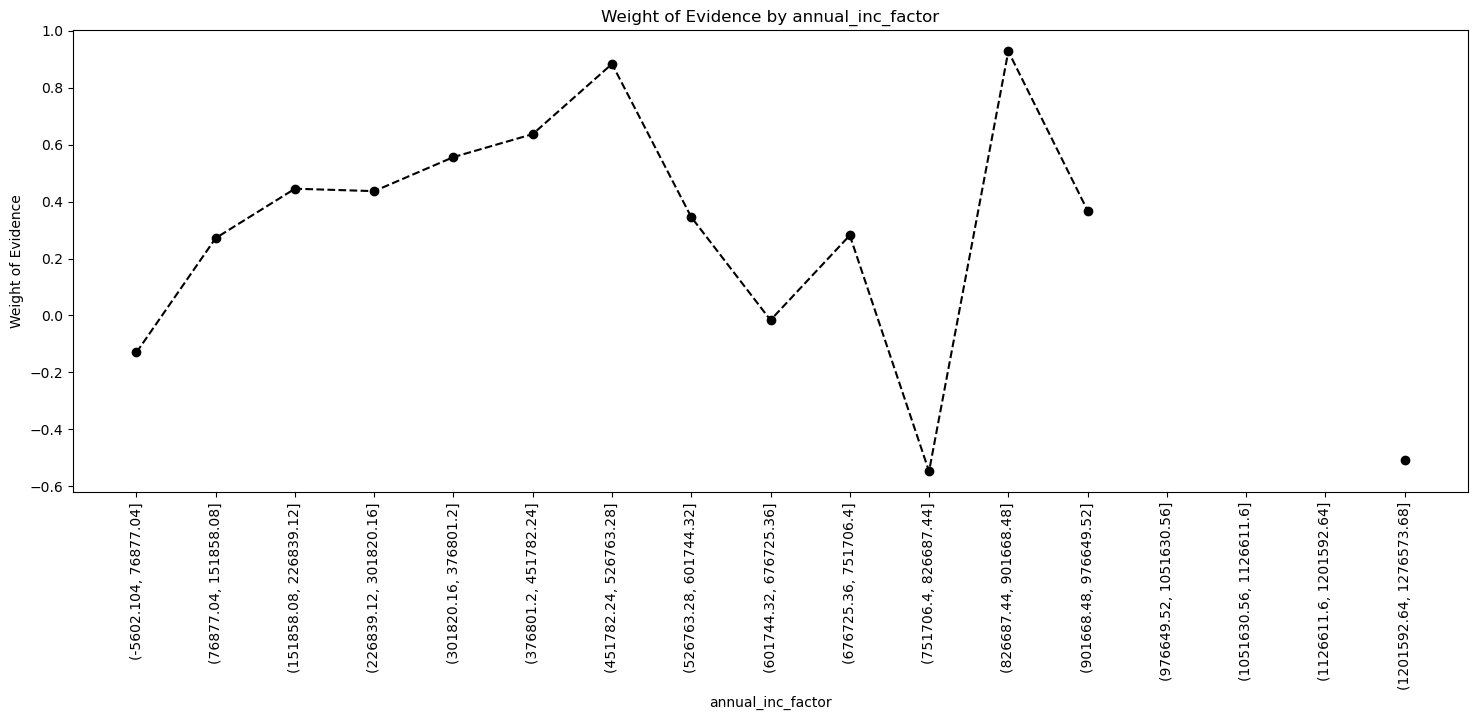

In [118]:
plot_woe(df22,90)

In [119]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
x['annual_inc:<20K'] = np.where((x['annual_inc'] <= 20000), 1, 0)
x['annual_inc:20K-30K'] = np.where((x['annual_inc'] > 20000) & (x['annual_inc'] <= 30000), 1, 0)
x['annual_inc:30K-40K'] = np.where((x['annual_inc'] > 30000) & (x['annual_inc'] <= 40000), 1, 0)
x['annual_inc:40K-50K'] = np.where((x['annual_inc'] > 40000) & (x['annual_inc'] <= 50000), 1, 0)
x['annual_inc:50K-60K'] = np.where((x['annual_inc'] > 50000) & (x['annual_inc'] <= 60000), 1, 0)
x['annual_inc:60K-70K'] = np.where((x['annual_inc'] > 60000) & (x['annual_inc'] <= 70000), 1, 0)
x['annual_inc:70K-80K'] = np.where((x['annual_inc'] > 70000) & (x['annual_inc'] <= 80000), 1, 0)
x['annual_inc:80K-90K'] = np.where((x['annual_inc'] > 80000) & (x['annual_inc'] <= 90000), 1, 0)
x['annual_inc:90K-100K'] = np.where((x['annual_inc'] > 90000) & (x['annual_inc'] <= 100000), 1, 0)
x['annual_inc:100K-120K'] = np.where((x['annual_inc'] > 100000) & (x['annual_inc'] <= 120000), 1, 0)
x['annual_inc:120K-140K'] = np.where((x['annual_inc'] > 120000) & (x['annual_inc'] <= 140000), 1, 0)
x['annual_inc:>140K'] = np.where((x['annual_inc'] > 140000), 1, 0)

In [120]:
x=x.drop(['annual_inc','annual_inc_factor'],axis=1)

In [121]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
x1 = x[pd.notnull(x['mths_since_last_delinq'])]
x1['mths_since_last_delinq_factor'] = pd.cut(x['mths_since_last_delinq'], 50)

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\3120717467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['mths_since_last_delinq_factor'] = pd.cut(x['mths_since_last_delinq'], 50)


In [122]:
df23=woe_continuous(x1,'mths_since_last_delinq_factor',y)
df23

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",6625,0.872755,0.030681,5782.0,843.0,0.029950,0.036848,-0.207267,NaN,NaN,inf
1,"(3.76, 7.52]",13834,0.889692,0.064066,12308.0,1526.0,0.063754,0.066702,-0.045205,0.016937,0.162062,inf
2,"(7.52, 11.28]",16690,0.894128,0.077292,14923.0,1767.0,0.077299,0.077236,0.000816,0.004436,0.046021,inf
3,"(11.28, 15.04]",16547,0.889648,0.076630,14721.0,1826.0,0.076252,0.079815,-0.045657,0.004481,0.046473,inf
4,"(15.04, 18.8]",11645,0.896780,0.053929,10443.0,1202.0,0.054093,0.052540,0.029141,0.007132,0.074798,inf
5,"(18.8, 22.56]",14579,0.895397,0.067516,13054.0,1525.0,0.067618,0.066658,0.014296,0.001382,0.014845,inf
6,"(22.56, 26.32]",13603,0.897302,0.062996,12206.0,1397.0,0.063225,0.061063,0.034796,0.001905,0.020500,inf
7,"(26.32, 30.08]",13221,0.896831,0.061227,11857.0,1364.0,0.061417,0.059621,0.029692,0.000471,0.005104,inf
8,"(30.08, 33.84]",9442,0.901292,0.043726,8510.0,932.0,0.044080,0.040738,0.078860,0.004461,0.049168,inf
9,"(33.84, 37.6]",12168,0.900394,0.056351,10956.0,1212.0,0.056750,0.052977,0.068811,0.000898,0.010049,inf


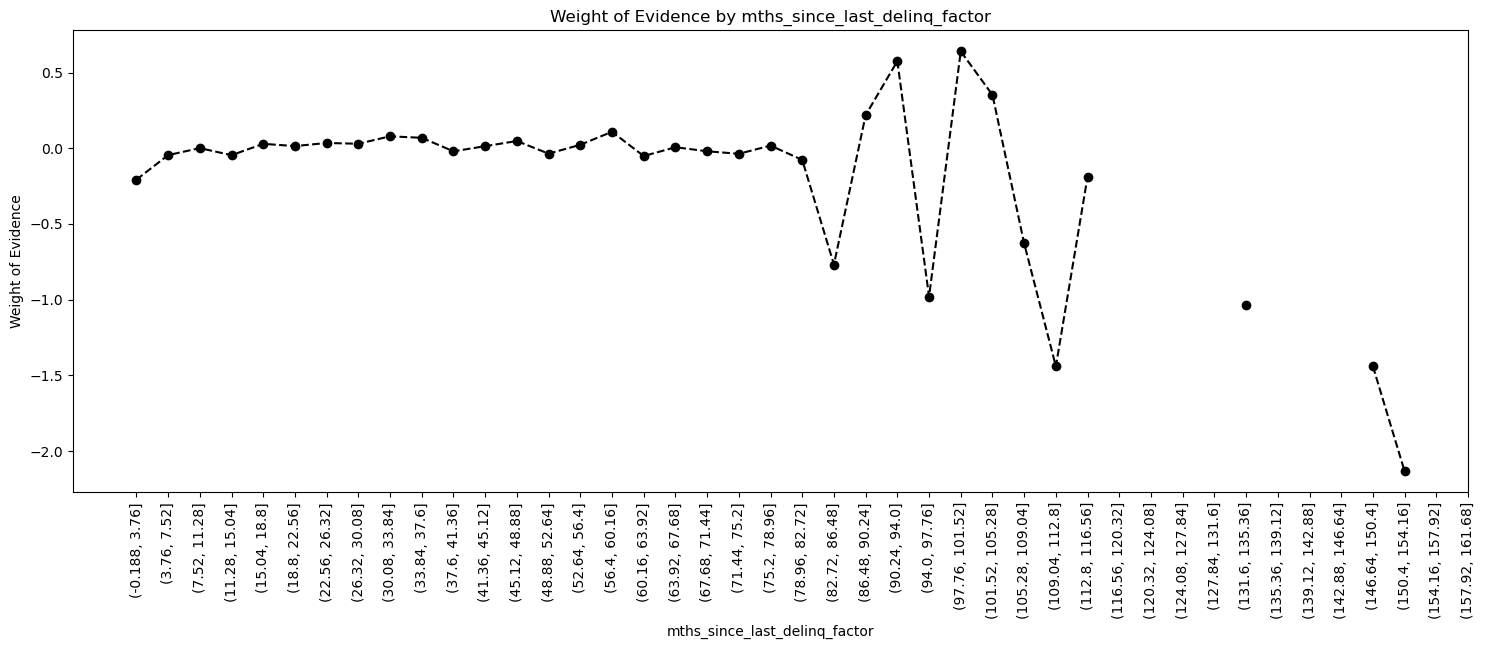

In [123]:
plot_woe(df23,90)

In [124]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
x['mths_since_last_delinq:Missing'] = np.where((x['mths_since_last_delinq'].isnull()), 1, 0)
x['mths_since_last_delinq:0-3'] = np.where((x['mths_since_last_delinq'] >= 0) & (x['mths_since_last_delinq'] <= 3), 1, 0)
x['mths_since_last_delinq:4-30'] = np.where((x['mths_since_last_delinq'] >= 4) & (x['mths_since_last_delinq'] <= 30), 1, 0)
x['mths_since_last_delinq:31-56'] = np.where((x['mths_since_last_delinq'] >= 31) & (x['mths_since_last_delinq'] <= 56), 1, 0)
x['mths_since_last_delinq:>=57'] = np.where((x['mths_since_last_delinq'] >= 57), 1, 0)

In [125]:
x=x.drop(['mths_since_last_delinq'],axis=1)

In [126]:
x['dti_factor']=pd.cut(x['dti'],50)

In [127]:
df24=woe_continuous(x,'dti_factor',y)
df24

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",1924,0.897609,0.004126,1727.0,197.0,0.004150,0.003929,0.054633,NaN,NaN,0.0263
1,"(0.8, 1.6]",2443,0.898895,0.005239,2196.0,247.0,0.005277,0.004927,0.068700,0.001286,0.014067,0.0263
2,"(1.6, 2.399]",3148,0.909784,0.006751,2864.0,284.0,0.006882,0.005665,0.194696,0.010889,0.125996,0.0263
3,"(2.399, 3.199]",4042,0.912420,0.008669,3688.0,354.0,0.008862,0.007061,0.227239,0.002636,0.032542,0.0263
4,"(3.199, 3.999]",5171,0.911042,0.011090,4711.0,460.0,0.011320,0.009175,0.210125,0.001377,0.017114,0.0263
5,"(3.999, 4.799]",6297,0.917103,0.013505,5775.0,522.0,0.013877,0.010412,0.287322,0.006061,0.077197,0.0263
6,"(4.799, 5.599]",7516,0.913385,0.016119,6865.0,651.0,0.016496,0.012985,0.239378,0.003719,0.047944,0.0263
7,"(5.599, 6.398]",8511,0.914816,0.018253,7786.0,725.0,0.018710,0.014461,0.257607,0.001431,0.018229,0.0263
8,"(6.398, 7.198]",9664,0.915873,0.020726,8851.0,813.0,0.021269,0.016216,0.271251,0.001057,0.013644,0.0263
9,"(7.198, 7.998]",10974,0.915345,0.023535,10045.0,929.0,0.024138,0.018530,0.264417,0.000528,0.006833,0.0263


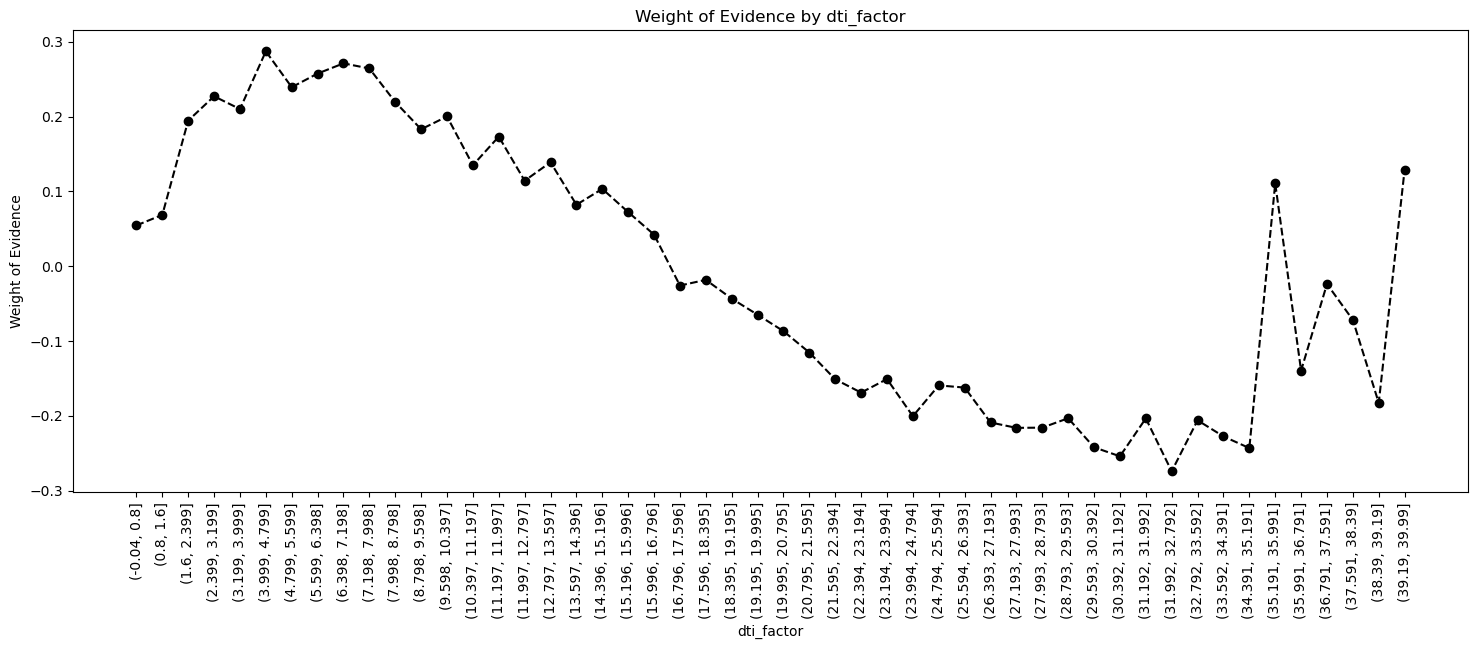

In [128]:
plot_woe(df24,90)

In [129]:
# Categories:
x['dti:<=1.4'] = np.where((x['dti'] <= 1.4), 1, 0)
x['dti:1.4-3.5'] = np.where((x['dti'] > 1.4) & (x['dti'] <= 3.5), 1, 0)
x['dti:3.5-7.7'] = np.where((x['dti'] > 3.5) & (x['dti'] <= 7.7), 1, 0)
x['dti:7.7-10.5'] = np.where((x['dti'] > 7.7) & (x['dti'] <= 10.5), 1, 0)
x['dti:10.5-16.1'] = np.where((x['dti'] > 10.5) & (x['dti'] <= 16.1), 1, 0)
x['dti:16.1-20.3'] = np.where((x['dti'] > 16.1) & (x['dti'] <= 20.3), 1, 0)
x['dti:20.3-21.7'] = np.where((x['dti'] > 20.3) & (x['dti'] <= 21.7), 1, 0)
x['dti:21.7-22.4'] = np.where((x['dti'] > 21.7) & (x['dti'] <= 22.4), 1, 0)
x['dti:22.4-35'] = np.where((x['dti'] > 22.4) & (x['dti'] <= 35), 1, 0)
x['dti:>35'] = np.where((x['dti'] > 35), 1, 0)

In [130]:
x=x.drop(['dti','dti_factor'],axis=1)

In [131]:
x2=x[pd.notnull(x['mths_since_last_record'])]
x2['mths_since_last_record_factor']=pd.cut(x['mths_since_last_record'],50)

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\618765283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['mths_since_last_record_factor']=pd.cut(x['mths_since_last_record'],50)


In [132]:
df25=woe_continuous(x2,'mths_since_last_record_factor',y)
df25

C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = pd.concat([df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].count(),
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\325140654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(df3.columns.values[0], as_index = False)[df3.columns.values[1]].mean()], axis = 1)
C:\Users\arind\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1330,0.760150,0.021233,1011.0,319.0,0.018013,0.048979,-1.000277,NaN,NaN,inf
1,"(2.58, 5.16]",156,0.897436,0.002491,140.0,16.0,0.002494,0.002457,0.015273,0.137286,1.015550,inf
2,"(5.16, 7.74]",158,0.930380,0.002522,147.0,11.0,0.002619,0.001689,0.438756,0.032944,0.423484,inf
3,"(7.74, 10.32]",306,0.915033,0.004885,280.0,26.0,0.004989,0.003992,0.222912,0.015347,0.215844,inf
4,"(10.32, 12.9]",250,0.896000,0.003991,224.0,26.0,0.003991,0.003992,-0.000232,0.019033,0.223144,inf
5,"(12.9, 15.48]",387,0.909561,0.006178,352.0,35.0,0.006272,0.005374,0.154502,0.013561,0.154734,inf
6,"(15.48, 18.06]",419,0.911695,0.006689,382.0,37.0,0.006806,0.005681,0.180722,0.002134,0.026220,inf
7,"(18.06, 20.64]",308,0.931818,0.004917,287.0,21.0,0.005114,0.003224,0.461179,0.020124,0.280457,inf
8,"(20.64, 23.22]",552,0.909420,0.008813,502.0,50.0,0.008944,0.007677,0.152796,0.022398,0.308383,inf
9,"(23.22, 25.8]",400,0.907500,0.006386,363.0,37.0,0.006468,0.005681,0.129704,0.001920,0.023092,inf


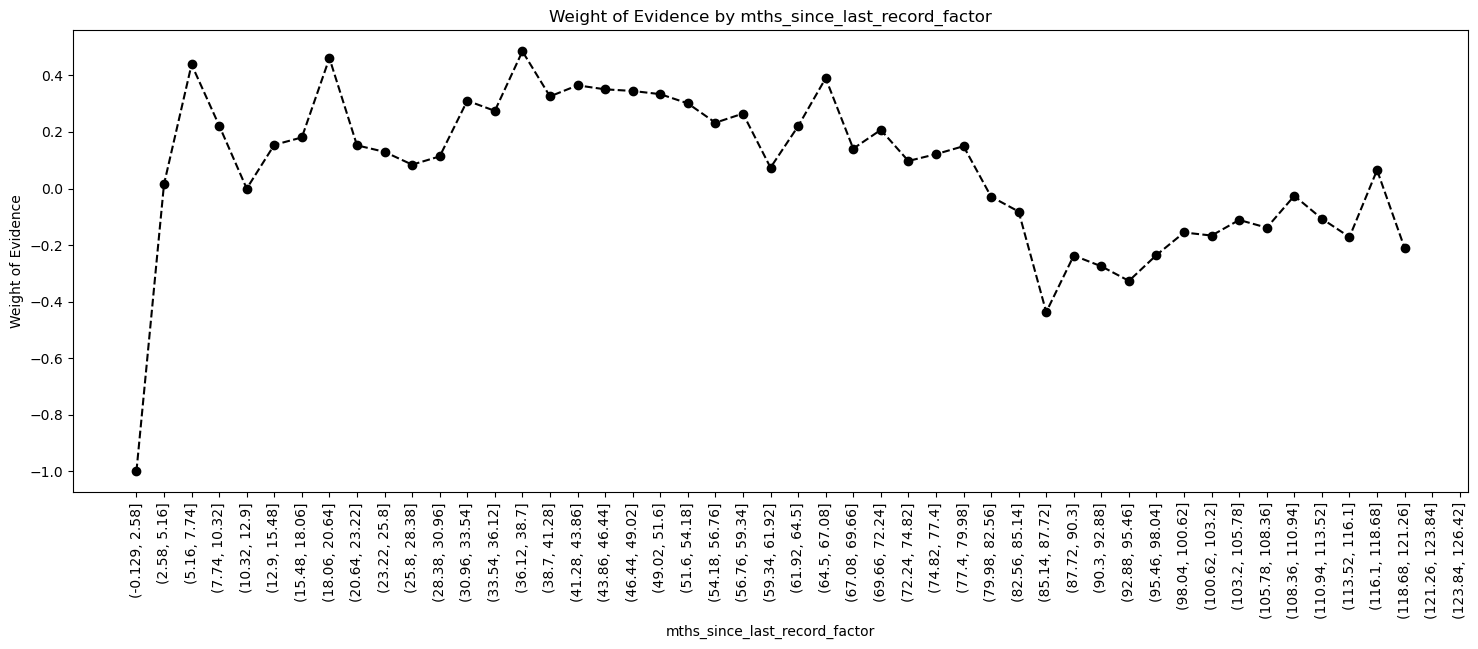

In [133]:
plot_woe(df25,90)

In [134]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
x['mths_since_last_record:Missing'] = np.where((x['mths_since_last_record'].isnull()), 1, 0)
x['mths_since_last_record:0-2'] = np.where((x['mths_since_last_record'] >= 0) & (x['mths_since_last_record'] <= 2), 1, 0)
x['mths_since_last_record:3-20'] = np.where((x['mths_since_last_record'] >= 3) & (x['mths_since_last_record'] <= 20), 1, 0)
x['mths_since_last_record:21-31'] = np.where((x['mths_since_last_record'] >= 21) & (x['mths_since_last_record'] <= 31), 1, 0)
x['mths_since_last_record:32-80'] = np.where((x['mths_since_last_record'] >= 32) & (x['mths_since_last_record'] <= 80), 1, 0)
x['mths_since_last_record:81-86'] = np.where((x['mths_since_last_record'] >= 81) & (x['mths_since_last_record'] <= 86), 1, 0)
x['mths_since_last_record:>86'] = np.where((x['mths_since_last_record'] > 86), 1, 0)

In [135]:
x=x.drop(['mths_since_last_record'],axis=1)

In [136]:
x.shape

(466285, 126)

In [137]:
y.shape

(466285,)

In [138]:
# All encoding is done now we will split the data into train & test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [139]:
x_train.to_csv('C:\\Users\\arind\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\x_train.csv')
x_test.to_csv('C:\\Users\\arind\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\x_test.csv')
y_train.to_csv('C:\\Users\\arind\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\y_train.csv')
y_test.to_csv('C:\\Users\\arind\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\y_test.csv')

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:4: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:4: SyntaxWarning: invalid escape sequence '\O'
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\271401826.py:1: SyntaxWarning: invalid escape sequence '\O'
  x_train.to_csv('C:\\Users\\arind\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\x_train.csv')
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\271401826.py:2: SyntaxWarning: invalid escape sequence '\O'
  x_test.to_csv('C:\\Users\\arind\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\x_test.csv')
C:\Users\arind\AppData\Local\Temp\ipykernel_23440\271401826.py:3: SyntaxWarning: invalid escape sequence '\O'
  y_train.to_csv('C:\\Users\\a